In [1]:
import os
os.cpu_count()

12

In [2]:
#!pip install klib
#!pip install vecstack
#!pip install catboost
#!pip install lightgbm

In [3]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold


# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from bayes_opt import BayesianOptimization

# Modeling
#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from itertools import combinations
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import ensemble, metrics
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet


# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from vecstack import stacking

C:\Users\lhj02\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read data

In [4]:
#df = pd.read_csv('totaldata.csv')
#df = df.drop('Unnamed: 0',axis='columns')
#df

In [5]:
main_df=pd.read_csv('Totaldata.csv',index_col="Date")
sup_df=pd.read_csv('supportindexscaled_000210.csv',index_col="Date")
df=pd.merge(main_df,sup_df,on="Date")
df=df.drop([df.columns[0],"ma_5","ma_20","ma_60","ma_120"],axis=1)
df

,Open,High,Low,Close,Volume,Change,C-Close,C-Change,Difference,C-Difference,MACD,BOL_H,BOL_L
Date,,,,,,,,,,,,,
1998-05-04,1761,1769,1685,1753,176170,0.000000,1347.00,0.802682,0,10.726036,0.520748,0.001456,0.006457
1998-05-06,1746,1784,1677,1730,193140,-1.312037,1368.50,1.596140,-23,21.500000,0.520654,0.001518,0.006240
1998-05-07,1719,1807,1685,1806,169580,4.393064,1401.50,2.411399,76,33.000000,0.520892,0.001850,0.006120
1998-05-08,1715,1807,1715,1753,65930,-2.934662,1387.00,-1.034606,-53,-14.500000,0.520860,0.001795,0.006154
1998-05-11,1753,1753,1600,1707,146200,-2.624073,1390.50,0.252343,-46,3.500000,0.520646,0.001791,0.006024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,69300,72700,68500,70900,234995,2.308802,1287.51,-1.105308,1600,-14.390000,0.573156,0.378227,0.391208
2022-07-01,71800,73000,70400,71300,180673,0.564175,1298.67,0.866789,400,11.160000,0.584427,0.380621,0.390471
2022-07-04,71600,72000,68700,70100,80246,-1.683029,1295.87,-0.215605,-1200,-2.800000,0.587628,0.381238,0.390312


1-2 속성간 유사성 시각화(corr)

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to further limit the results.


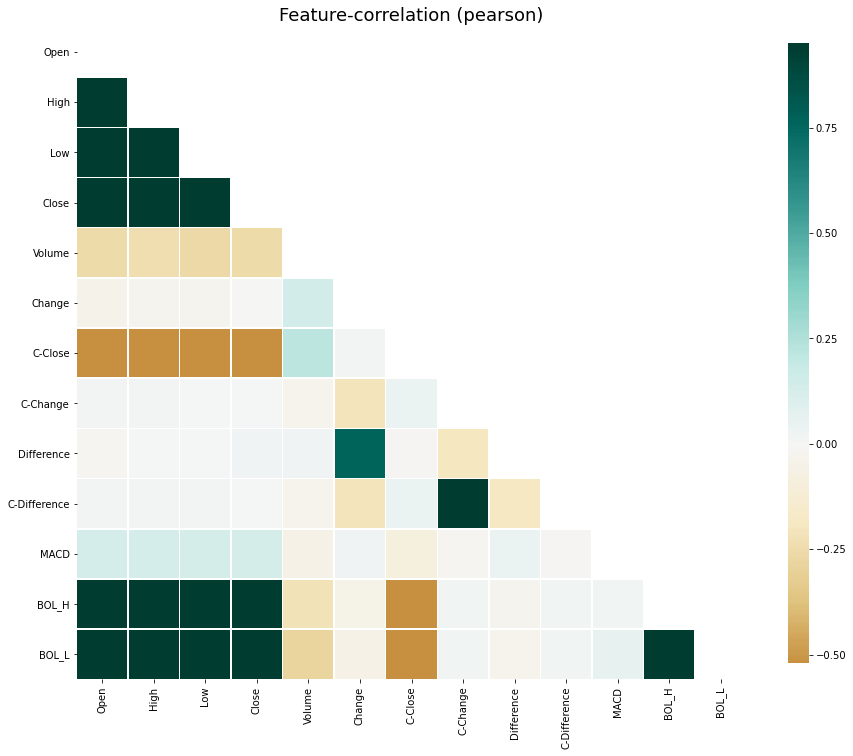

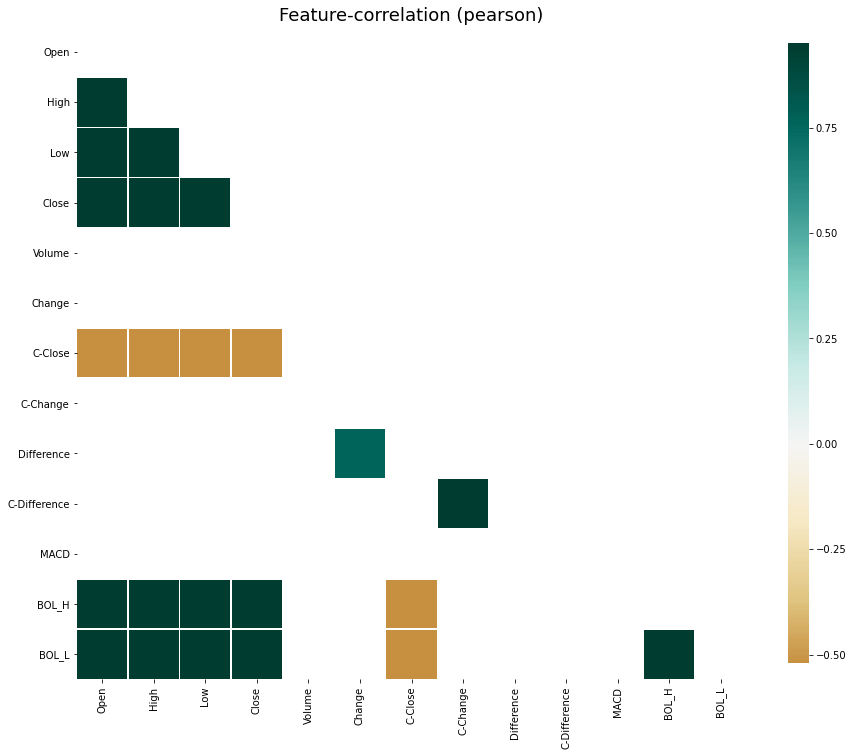

In [6]:
klib.corr_plot(df, annot=False, figsize=(15,12))
klib.corr_plot(df, split='high', annot=False, figsize=(15,12))

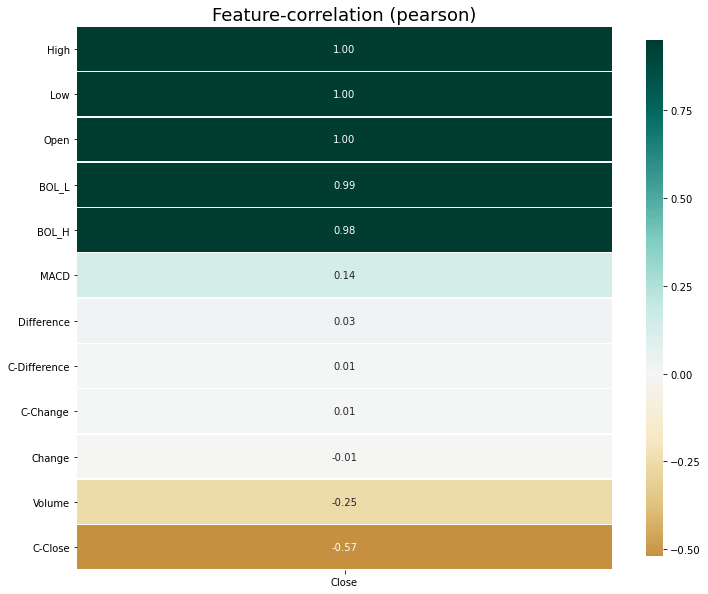

In [7]:
klib.corr_plot(df, target='Close') #알고싶은 열과 나머지 속성들이 어느정도의 상관성을 가지는지 시각화

In [8]:
df = df.drop('High',axis = 'columns')
df = df.drop('Low',axis = 'columns')

In [9]:
#df = df.drop('Date',axis = 'columns')
X = df.copy()
X = X.drop('Close',axis = 'columns')
y = df['Close']
y = pd.DataFrame(y)
#X_train = X[:3350]
#X_dev = X[3350:]
#y_train = y[:3350]
#y_dev = y[3350:]
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, shuffle =False, random_state=0)

In [10]:
rf = RandomForestRegressor(random_state=0, n_jobs=4)
gbm = GradientBoostingRegressor(random_state=0)
lgbm = lightgbm.LGBMRegressor(random_state=0 ,n_jobs=4)
xgb = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)
lr = LinearRegression(n_jobs=4)
cb = CatBoostRegressor(random_state=0 )
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
ridge = Ridge(alpha=1)
lasso = Lasso()
ard = ARDRegression()
bayesian = BayesianRidge()

models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet]

scores = cross_val_score(model, X_train, y_train) #내부적으로 fit
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
#scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5), scoring='r2')
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
#scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5), scoring=make_scorer(r2_score))

In [11]:
X_train= X_train.reset_index(drop=True)
X_dev= X_dev.reset_index(drop=True)
y_dev = y_dev.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_dev = y_dev.values
y_train = y_train.values
y_dev = np.array(y_dev).flatten().tolist()
y_train = np.array(y_train).flatten().tolist()

In [12]:
ts = time.time()

model = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric='rmse', 
    eval_set=[(X_train, y_train), (X_dev, y_dev)], 
    verbose=True,
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:46608.43750	validation_1-rmse:52439.09766
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:33014.96484	validation_1-rmse:36760.25000
[2]	validation_0-rmse:23675.87305	validation_1-rmse:25683.57617
[3]	validation_0-rmse:17195.22461	validation_1-rmse:17955.66406
[4]	validation_0-rmse:12831.99023	validation_1-rmse:12523.62598
[5]	validation_0-rmse:9906.70703	validation_1-rmse:9098.76856
[6]	validation_0-rmse:7976.75537	validation_1-rmse:6894.33008
[7]	validation_0-rmse:6797.08301	validation_1-rmse:5466.03613
[8]	validation_0-rmse:6043.27051	validation_1-rmse:4339.55762
[9]	validation_0-rmse:5567.76025	validation_1-rmse:3705.62988
[10]	validation_0-rmse:5310.91553	validation_1-rmse:3234.19775
[11]	validation_0-rmse:5120.25879	validation_1-rmse:2982.80884
[12]	validation_0-rmse:4995.71680	validation_1-rmse:2844.27637
[13]	validation_0-rmse

0.3920879364013672

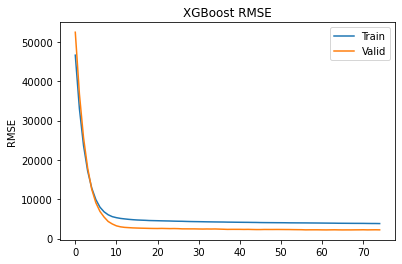

In [13]:
results = model.evals_result()
epochs = len(results['validation_1']['rmse'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Valid')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [14]:
xgb_train_pred = model.predict(X_train)
xgb_val_pred = model.predict(X_dev)

In [15]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, xgb_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, xgb_val_pred)))

Train rmse: 3886.499361115856
Validation rmse: 2199.573133536575


캣부스트

ts = time.time()

model = CatBoostRegressor(
      random_state = 42,
      learning_rate = 0.01,
      bagging_temperature =  0.01,
      n_estimators = 1000,
      max_depth = 16,
      random_strength = 100,
      colsample_bylevel =  0.4,
      l2_leaf_reg = 3e-5,
      min_child_samples =  5,
      max_bin =  200,
      od_type = 'IncToDec')

model.fit(
    X_train, 
    y_train,  
    eval_set=[(X_train, y_train), (X_dev, y_dev)], 
    verbose=True,
    early_stopping_rounds = 10)

time.time() - ts

catboost_model = CatBoostRegressor(
    iterations=1500,
    max_ctr_complexity=3,
    random_seed=0,
    od_wait=30,
    verbose=50,
    depth=5,
    learning_rate=0.2
)

catboost_model.fit(
    X_train, y_train,
    eval_set=(X_dev, y_dev)
)

catboost_train_pred = catboost_model.predict(X_train)
catboost_val_pred = catboost_model.predict(X_dev)

print('Train rmse:', np.sqrt(mean_squared_error(y_train, catboost_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, catboost_val_pred)))

In [16]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=9, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_dev)

In [17]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, rf_val_pred)))

Train rmse: 637.0384667547886
Validation rmse: 932.8113498085326


In [18]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
lr_train_pred = lr_model.predict(X_train)
lr_val_pred = lr_model.predict(X_dev)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, lr_val_pred)))

Train rmse: 901.4246447694962
Validation rmse: 712.8739275935127


In [20]:
my_predictions = {}


colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]



def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_dev, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def rmse_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    rmse = np.sqrt(mean_squared_error(actual, pred))
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])
    
    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

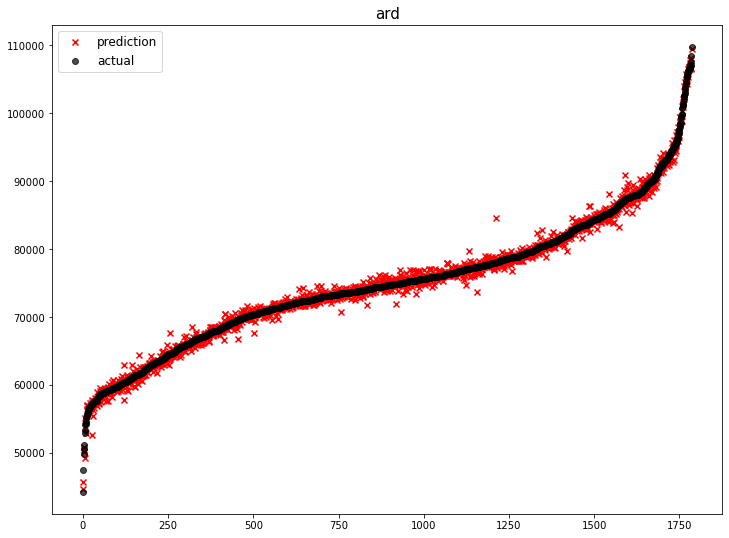

  model        rmse
0   ard  712.920879


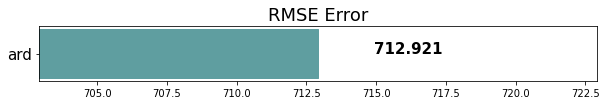

In [21]:
ard = ARDRegression(alpha_1=0.01, alpha_2=0.01, lambda_1=1e-06, lambda_2=1e-06)
ard.fit(X_train, y_train)
ard_pred = ard.predict(X_dev)
rmse_eval('ard', y_dev, ard_pred)

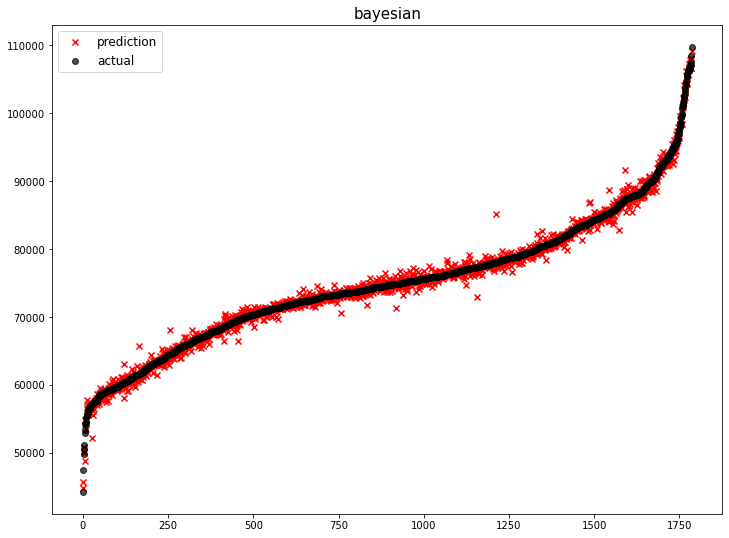

      model        rmse
0  bayesian  738.693866
1       ard  712.920879


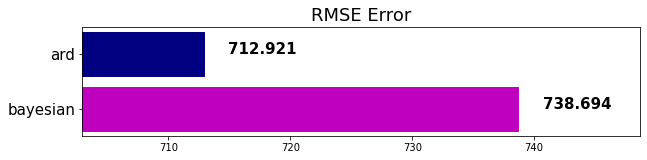

In [22]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_pred = bayesian.predict(X_dev)
rmse_eval('bayesian', y_dev, bayesian_pred)

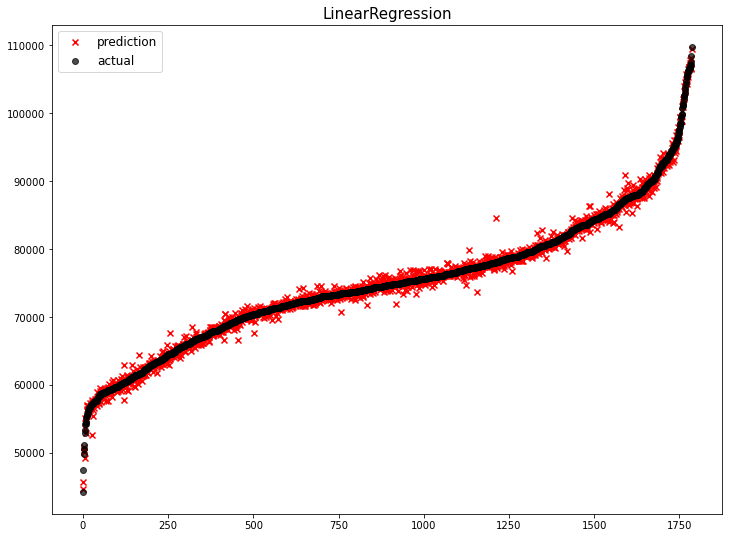

              model        rmse
0          bayesian  738.693866
1               ard  712.920879
2  LinearRegression  712.873928


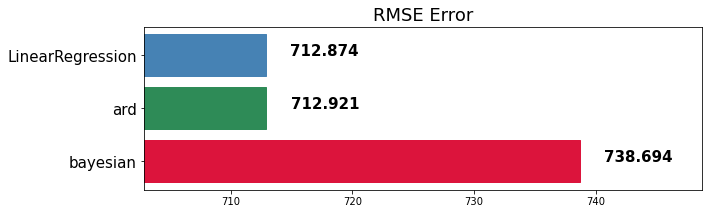

In [23]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_dev)
rmse_eval('LinearRegression', y_dev, linear_pred)

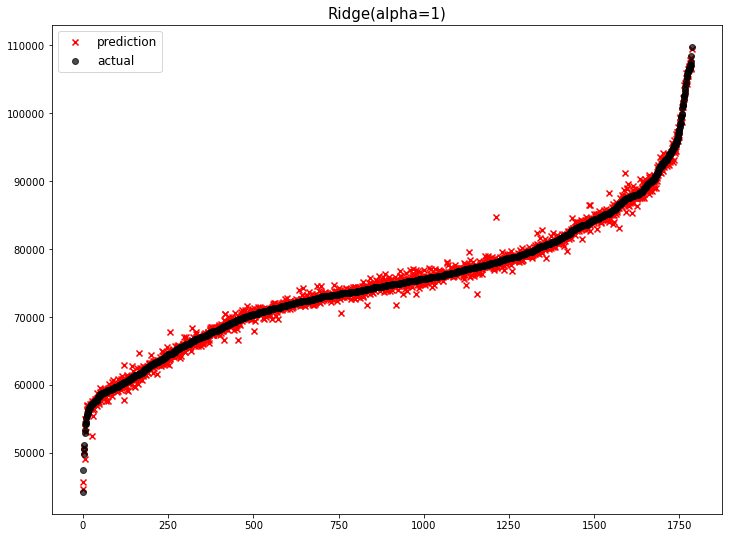

              model        rmse
0          bayesian  738.693866
1    Ridge(alpha=1)  715.392932
2               ard  712.920879
3  LinearRegression  712.873928


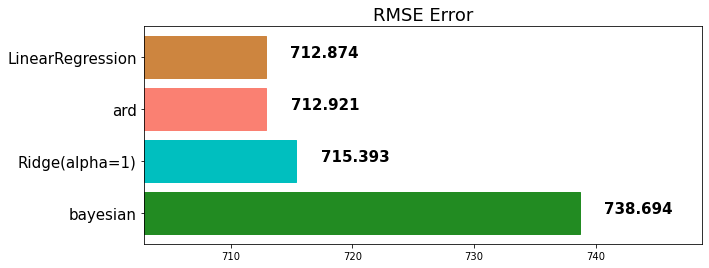

In [24]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_dev)
rmse_eval('Ridge(alpha=1)', y_dev, ridge_pred)

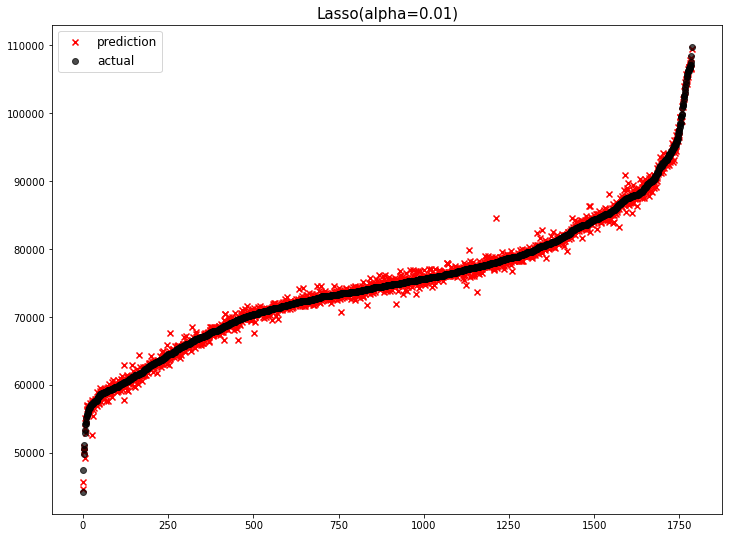

               model        rmse
0           bayesian  738.693866
1     Ridge(alpha=1)  715.392932
2                ard  712.920879
3   LinearRegression  712.873928
4  Lasso(alpha=0.01)  712.858958


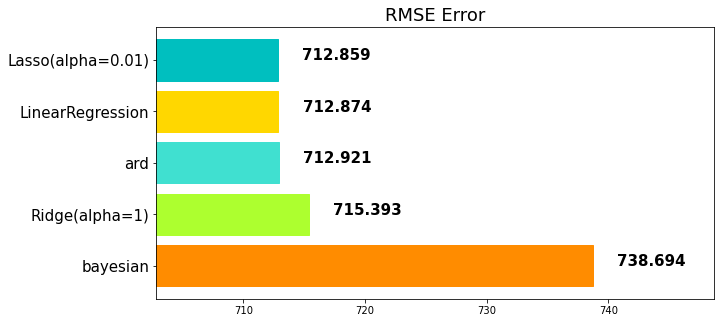

In [25]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_dev)
rmse_eval('Lasso(alpha=0.01)', y_dev, lasso_pred)

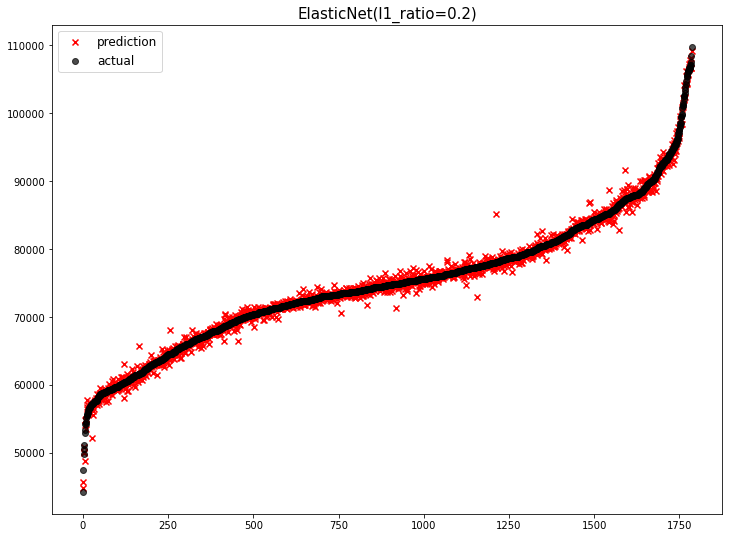

                      model        rmse
0  ElasticNet(l1_ratio=0.2)  739.192023
1                  bayesian  738.693866
2            Ridge(alpha=1)  715.392932
3                       ard  712.920879
4          LinearRegression  712.873928
5         Lasso(alpha=0.01)  712.858958


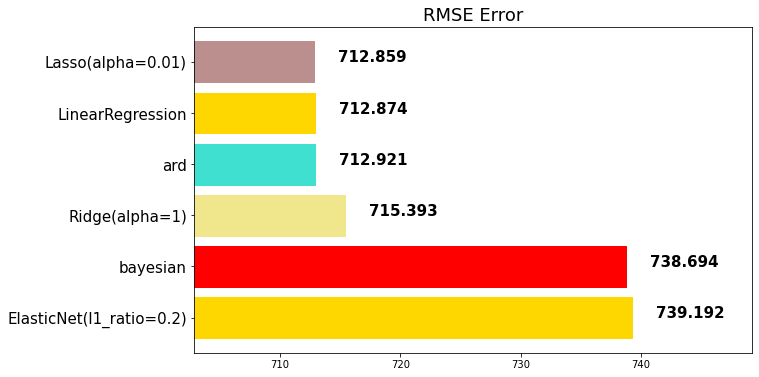

In [26]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(X_train, y_train)
elas_pred = elasticnet.predict(X_dev)
rmse_eval('ElasticNet(l1_ratio=0.2)', y_dev, elas_pred)

catboost = CatBoostRegressor(
    iterations=1500,
    max_ctr_complexity=3,
    random_seed=0,
    od_wait=30,
    verbose=50,
    depth=5,
    learning_rate=0.2
)

catboost.fit(X_train, y_train)
cat_pred = catboost.predict(X_dev)
mse_eval('catboost', y_dev, cat_pred)

In [27]:
single_models = [
    ('lr ', lr),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet)
]
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('lr ', LinearRegression(n_jobs=4)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet',
                             ElasticNet(alpha=0.5, l1_ratio=0.2))],
                n_jobs=-1)

보팅 앙상블(회귀버전)

In [28]:
VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('ard', ARDRegression())],
                n_jobs=-1)

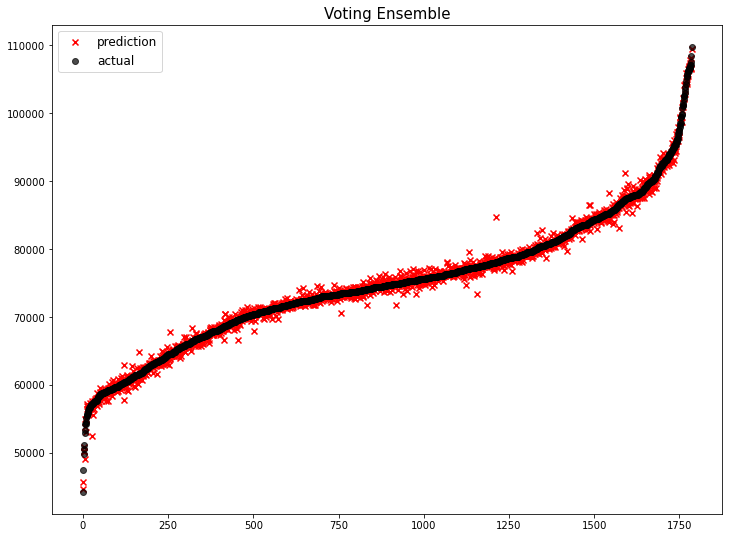

                      model        rmse
0  ElasticNet(l1_ratio=0.2)  739.192023
1                  bayesian  738.693866
2            Ridge(alpha=1)  715.392932
3           Voting Ensemble  714.357333
4                       ard  712.920879
5          LinearRegression  712.873928
6         Lasso(alpha=0.01)  712.858958


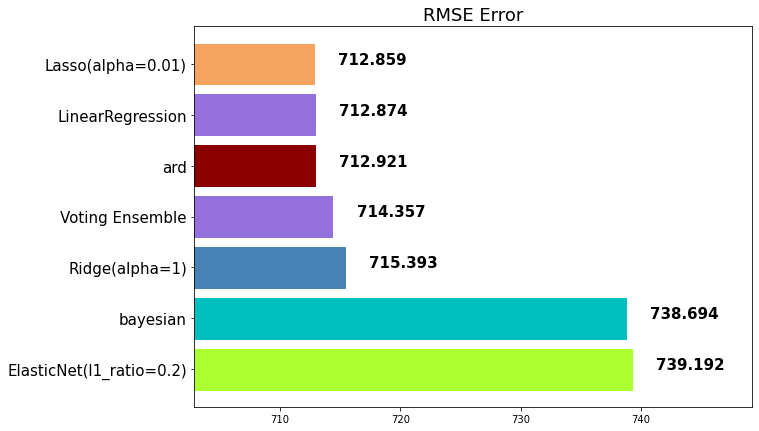

In [29]:
voting_pred = voting_regressor.predict(X_dev)
rmse_eval('Voting Ensemble', y_dev, voting_pred)

랜덤포레스트 앙상블

In [30]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

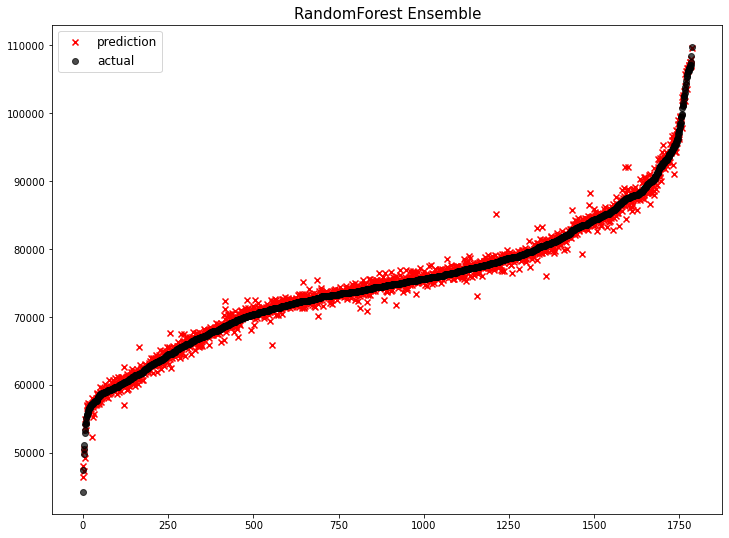

                      model        rmse
0     RandomForest Ensemble  890.370605
1  ElasticNet(l1_ratio=0.2)  739.192023
2                  bayesian  738.693866
3            Ridge(alpha=1)  715.392932
4           Voting Ensemble  714.357333
5                       ard  712.920879
6          LinearRegression  712.873928
7         Lasso(alpha=0.01)  712.858958


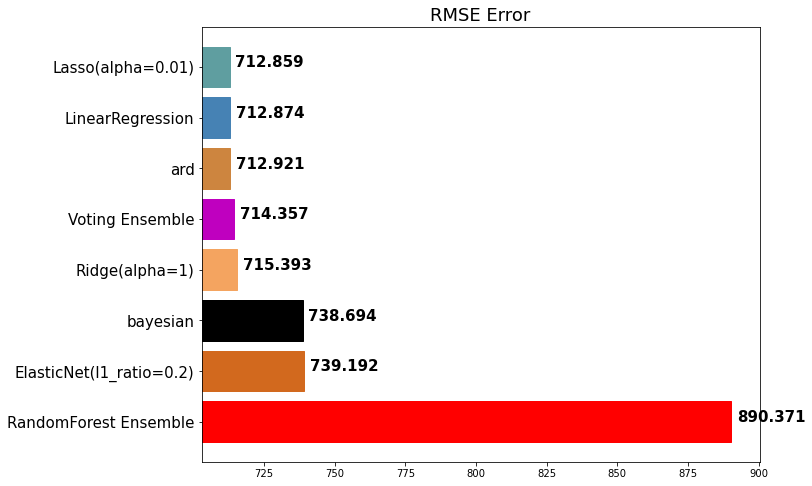

In [31]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='rmse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

rfr_pred = rfr.predict(X_dev)
rmse_eval('RandomForest Ensemble', y_dev, rfr_pred)

In [32]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [33]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [34]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


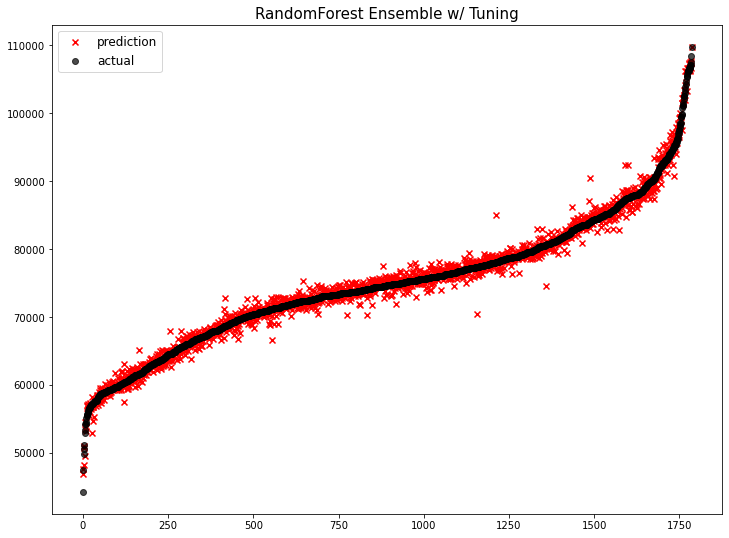

                             model        rmse
0  RandomForest Ensemble w/ Tuning  998.024011
1            RandomForest Ensemble  890.370605
2         ElasticNet(l1_ratio=0.2)  739.192023
3                         bayesian  738.693866
4                   Ridge(alpha=1)  715.392932
5                  Voting Ensemble  714.357333
6                              ard  712.920879
7                 LinearRegression  712.873928
8                Lasso(alpha=0.01)  712.858958


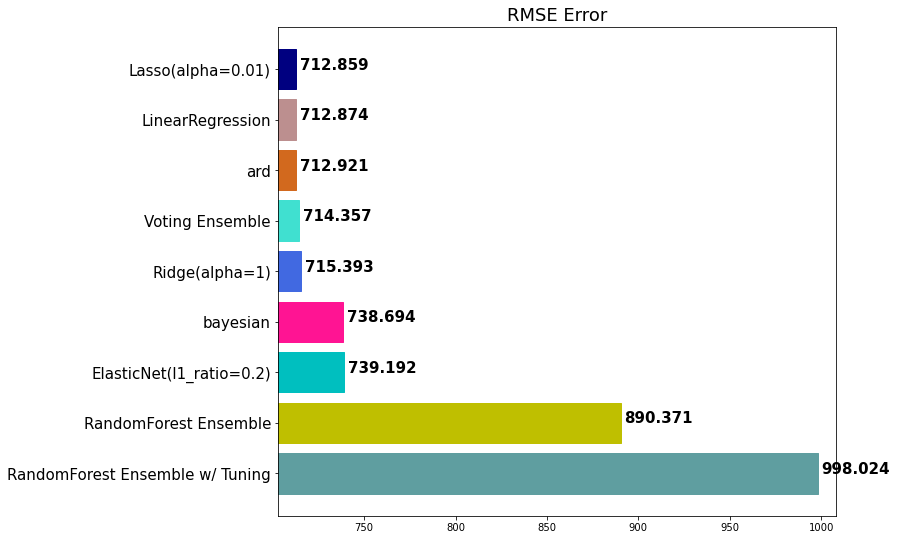

In [35]:
rfr_t = RandomForestRegressor(bootstrap = True, max_depth = None,random_state =50,max_features = "auto", n_estimators = 8)
rfr_t.fit(X_train, y_train)
rfr_t_pred = rfr_t.predict(X_dev)
rmse_eval('RandomForest Ensemble w/ Tuning', y_dev, rfr_t_pred)

그레디언트 부스팅 앙상블 (회귀버전)

In [36]:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, #presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(random_state=1)

In [37]:
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

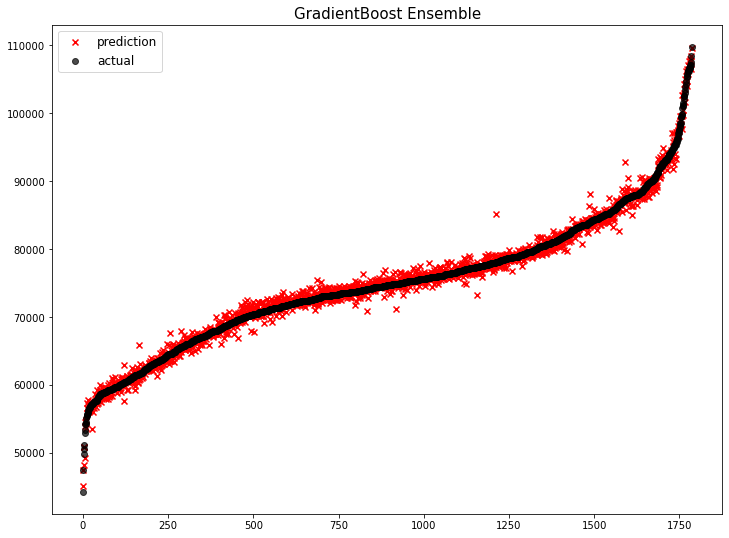

                             model        rmse
0  RandomForest Ensemble w/ Tuning  998.024011
1            RandomForest Ensemble  890.370605
2           GradientBoost Ensemble  888.371149
3         ElasticNet(l1_ratio=0.2)  739.192023
4                         bayesian  738.693866
5                   Ridge(alpha=1)  715.392932
6                  Voting Ensemble  714.357333
7                              ard  712.920879
8                 LinearRegression  712.873928
9                Lasso(alpha=0.01)  712.858958


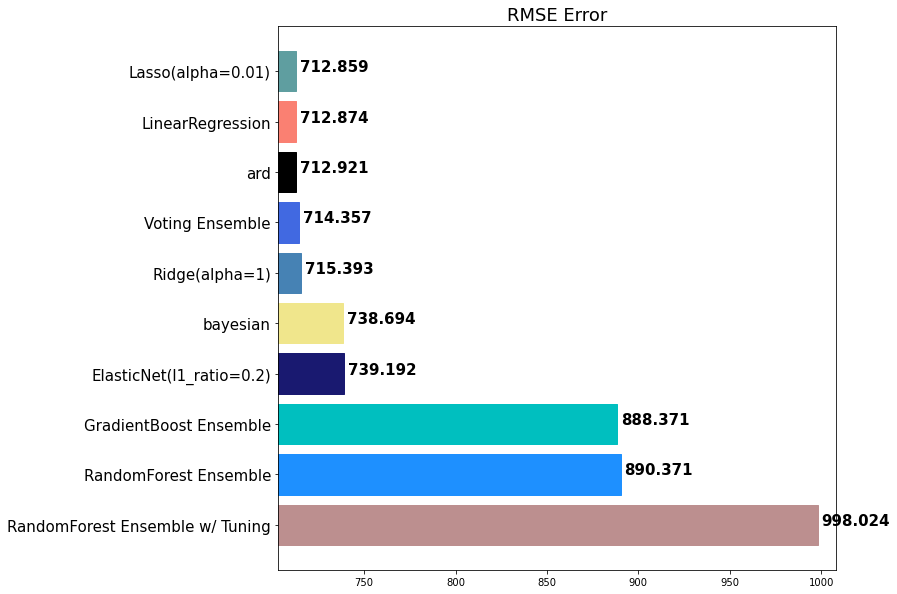

In [38]:
gbr_pred = gbr.predict(X_dev)
rmse_eval('GradientBoost Ensemble', y_dev, gbr_pred)

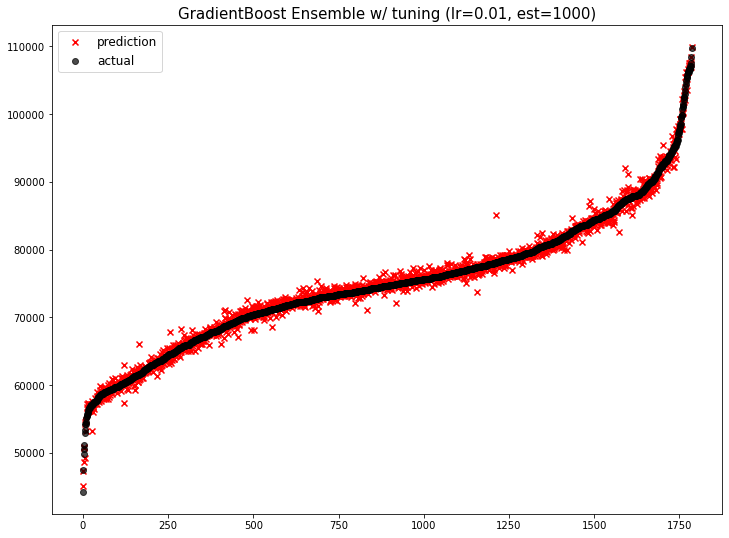

                                                model        rmse
0                     RandomForest Ensemble w/ Tuning  998.024011
1                               RandomForest Ensemble  890.370605
2                              GradientBoost Ensemble  888.371149
3   GradientBoost Ensemble w/ tuning (lr=0.01, est...  823.059089
4                            ElasticNet(l1_ratio=0.2)  739.192023
5                                            bayesian  738.693866
6                                      Ridge(alpha=1)  715.392932
7                                     Voting Ensemble  714.357333
8                                                 ard  712.920879
9                                    LinearRegression  712.873928
10                                  Lasso(alpha=0.01)  712.858958


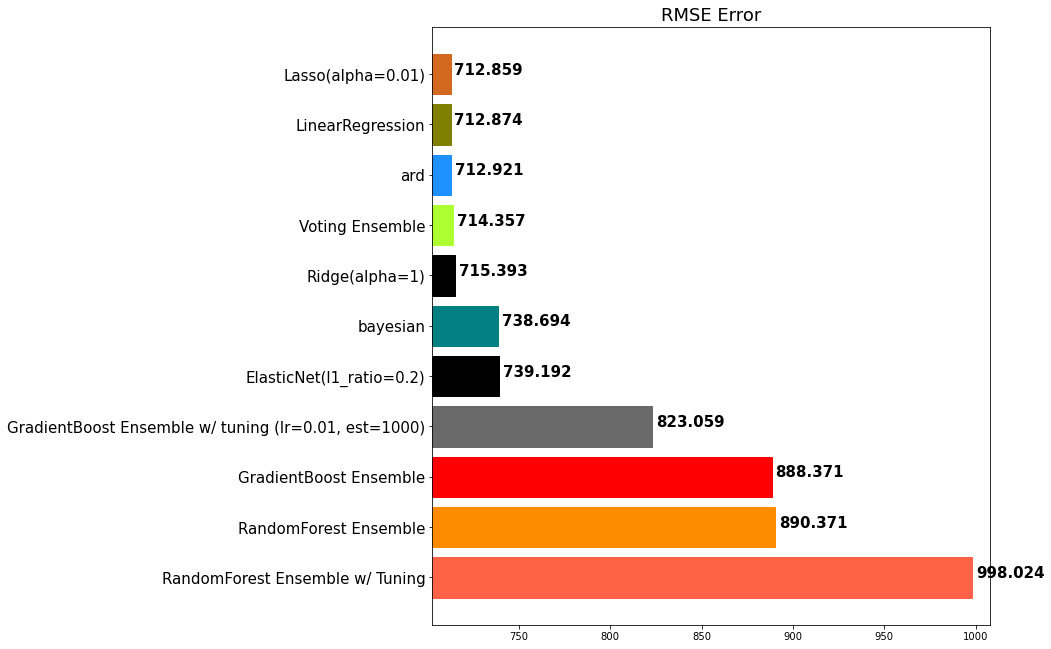

In [39]:
gbr_t2 = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000)
gbr_t2.fit(X_train, y_train)
gbr_t2_pred = gbr_t2.predict(X_dev)
rmse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000)', y_dev, gbr_t2_pred)

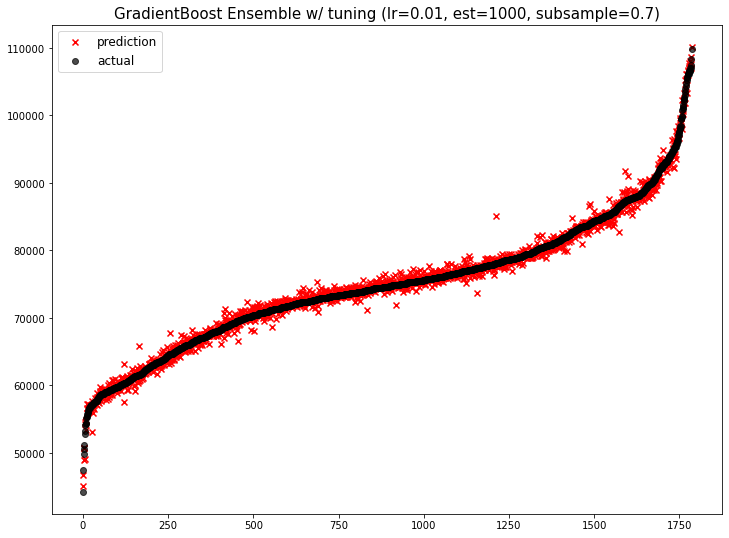

                                                model        rmse
0                     RandomForest Ensemble w/ Tuning  998.024011
1                               RandomForest Ensemble  890.370605
2                              GradientBoost Ensemble  888.371149
3   GradientBoost Ensemble w/ tuning (lr=0.01, est...  823.059089
4   GradientBoost Ensemble w/ tuning (lr=0.01, est...  804.694014
5                            ElasticNet(l1_ratio=0.2)  739.192023
6                                            bayesian  738.693866
7                                      Ridge(alpha=1)  715.392932
8                                     Voting Ensemble  714.357333
9                                                 ard  712.920879
10                                   LinearRegression  712.873928
11                                  Lasso(alpha=0.01)  712.858958


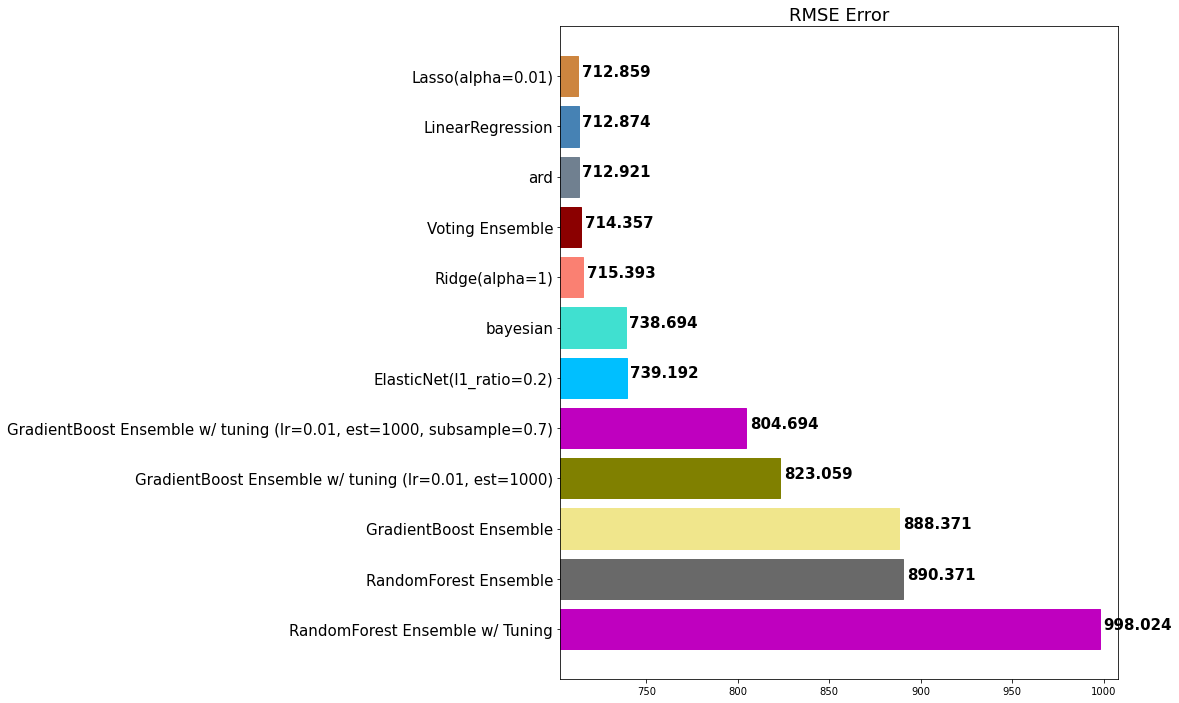

In [40]:
gbr_t3 = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.7)
gbr_t3.fit(X_train, y_train)
gbr_t3_pred = gbr_t3.predict(X_dev)
rmse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000, subsample=0.7)', y_dev, gbr_t3_pred)

xg부스터 앙상블(회귀버전)

In [41]:
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, #missing=NAN, 
             monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

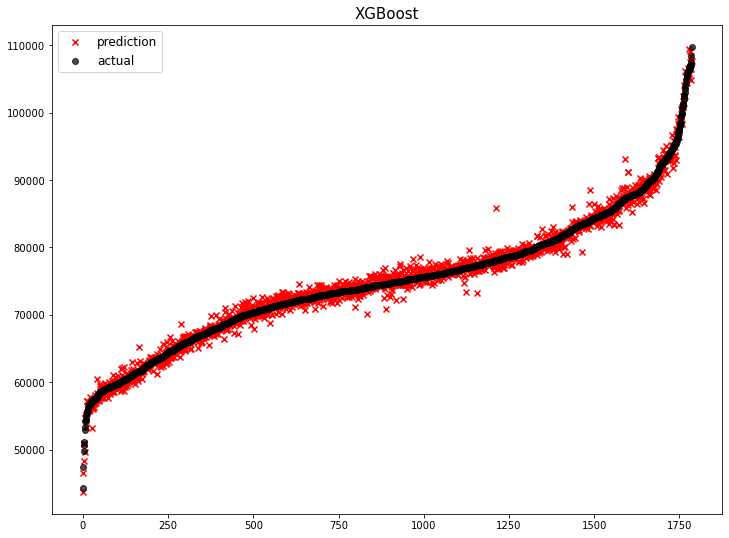

                                                model        rmse
0                     RandomForest Ensemble w/ Tuning  998.024011
1                                             XGBoost  950.514117
2                               RandomForest Ensemble  890.370605
3                              GradientBoost Ensemble  888.371149
4   GradientBoost Ensemble w/ tuning (lr=0.01, est...  823.059089
5   GradientBoost Ensemble w/ tuning (lr=0.01, est...  804.694014
6                            ElasticNet(l1_ratio=0.2)  739.192023
7                                            bayesian  738.693866
8                                      Ridge(alpha=1)  715.392932
9                                     Voting Ensemble  714.357333
10                                                ard  712.920879
11                                   LinearRegression  712.873928
12                                  Lasso(alpha=0.01)  712.858958


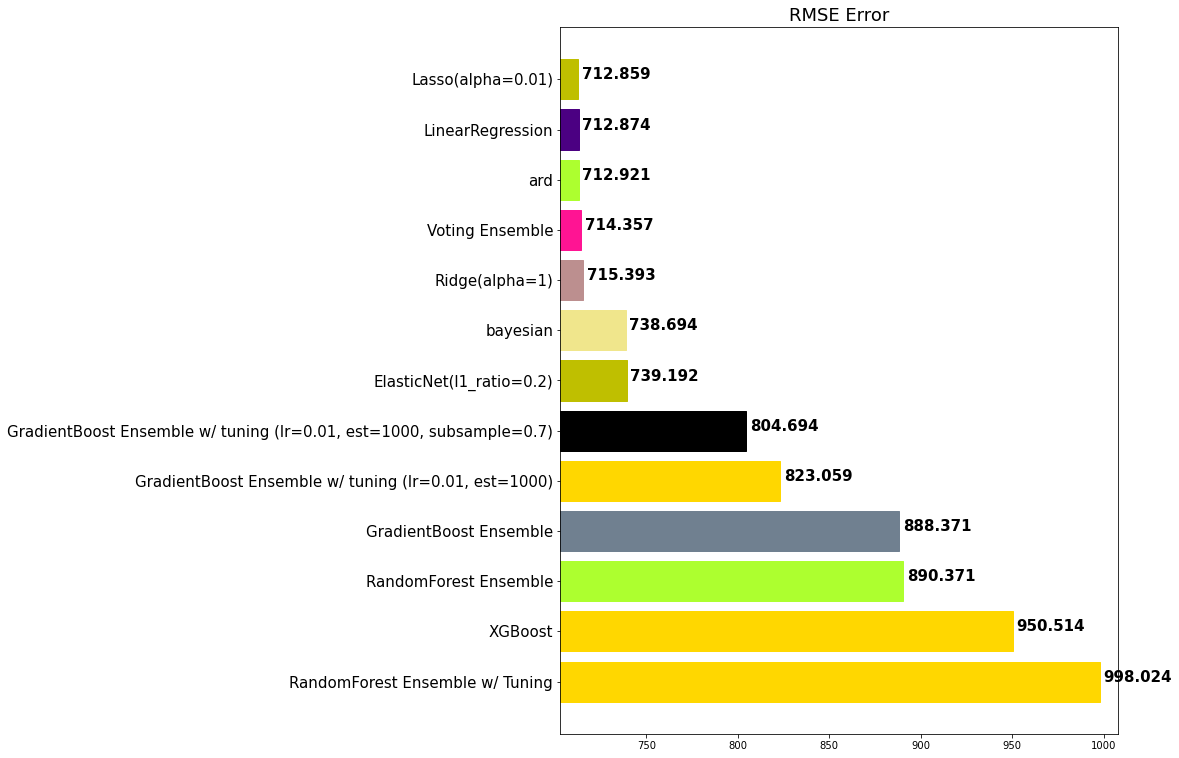

In [43]:
xgb_pred = xgb.predict(X_dev)
rmse_eval('XGBoost', y_dev, xgb_pred)

[17:03:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




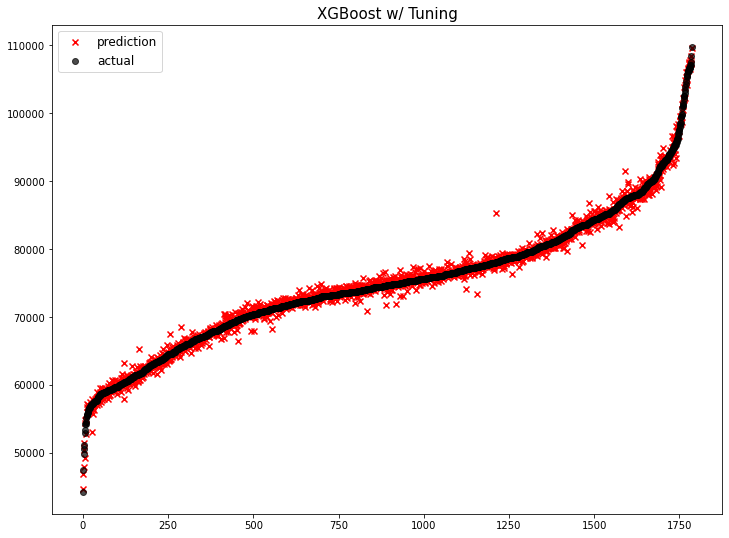

                                                model        rmse
0                     RandomForest Ensemble w/ Tuning  998.024011
1                                             XGBoost  950.514117
2                               RandomForest Ensemble  890.370605
3                              GradientBoost Ensemble  888.371149
4   GradientBoost Ensemble w/ tuning (lr=0.01, est...  823.059089
5                                   XGBoost w/ Tuning  809.010517
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  804.694014
7                            ElasticNet(l1_ratio=0.2)  739.192023
8                                            bayesian  738.693866
9                                      Ridge(alpha=1)  715.392932
10                                    Voting Ensemble  714.357333
11                                                ard  712.920879
12                                   LinearRegression  712.873928
13                                  Lasso(alpha=0.01)  712.858958


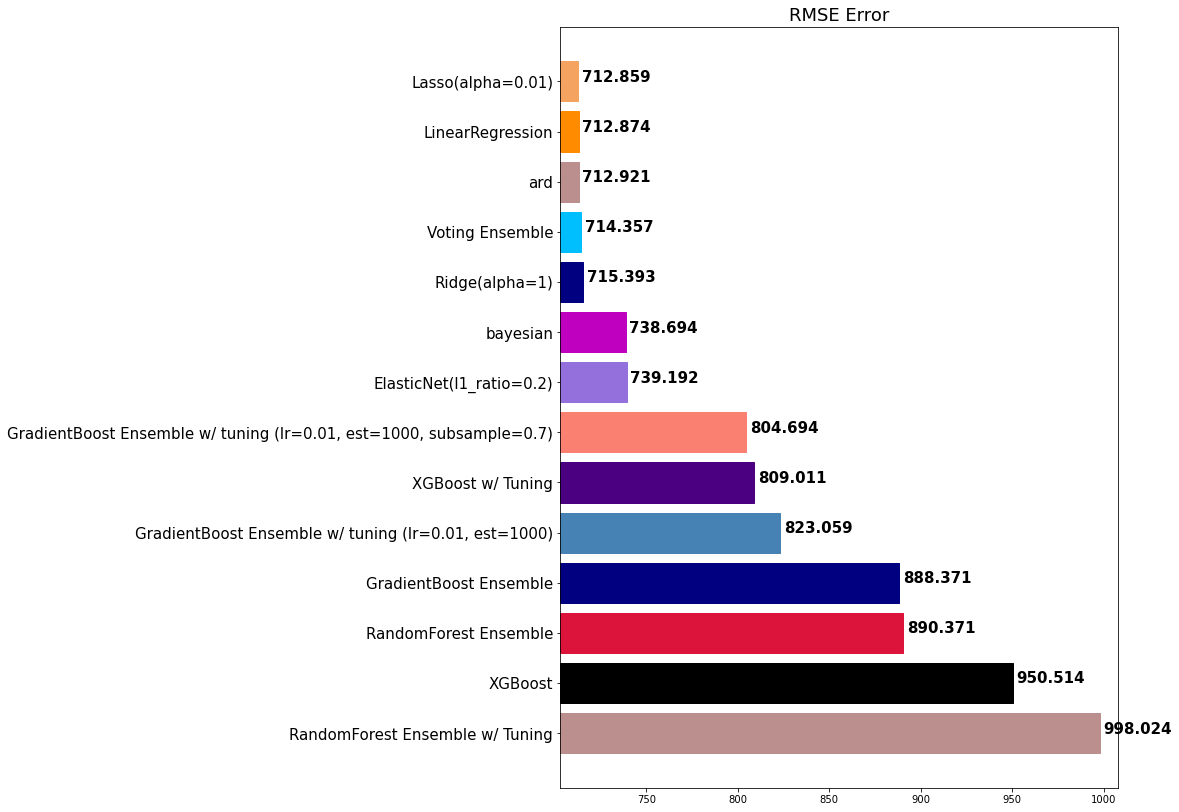

In [44]:
xgb_t = XGBRegressor(random_state=1, learning_rate=0.01, n_estimators=1000, subsample=0.7, max_features=0.8, max_depth=7)
xgb_t.fit(X_train, y_train)
xgb_t_pred = xgb_t.predict(X_dev)
rmse_eval('XGBoost w/ Tuning', y_dev, xgb_t_pred)

LGBM앙상블 회귀버전

In [45]:
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=1)

In [46]:
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMRegressor(random_state=1, silent=True)

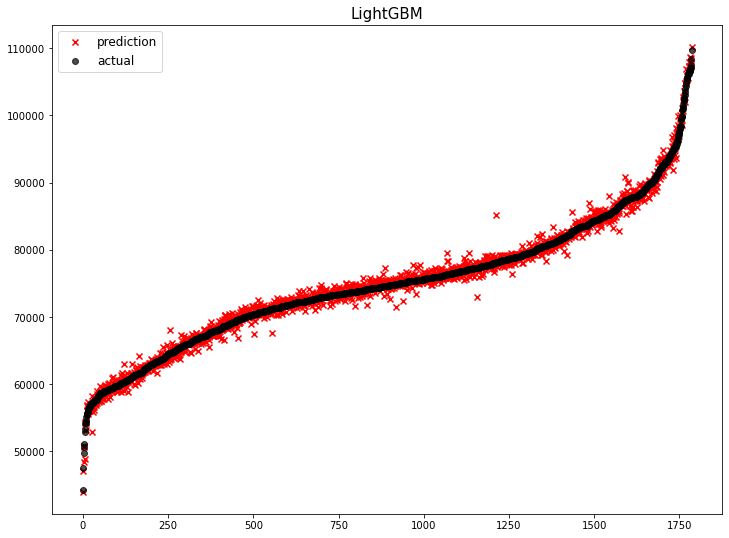

                                                model        rmse
0                     RandomForest Ensemble w/ Tuning  998.024011
1                                             XGBoost  950.514117
2                               RandomForest Ensemble  890.370605
3                              GradientBoost Ensemble  888.371149
4                                            LightGBM  832.532905
5   GradientBoost Ensemble w/ tuning (lr=0.01, est...  823.059089
6                                   XGBoost w/ Tuning  809.010517
7   GradientBoost Ensemble w/ tuning (lr=0.01, est...  804.694014
8                            ElasticNet(l1_ratio=0.2)  739.192023
9                                            bayesian  738.693866
10                                     Ridge(alpha=1)  715.392932
11                                    Voting Ensemble  714.357333
12                                                ard  712.920879
13                                   LinearRegression  712.873928
14        

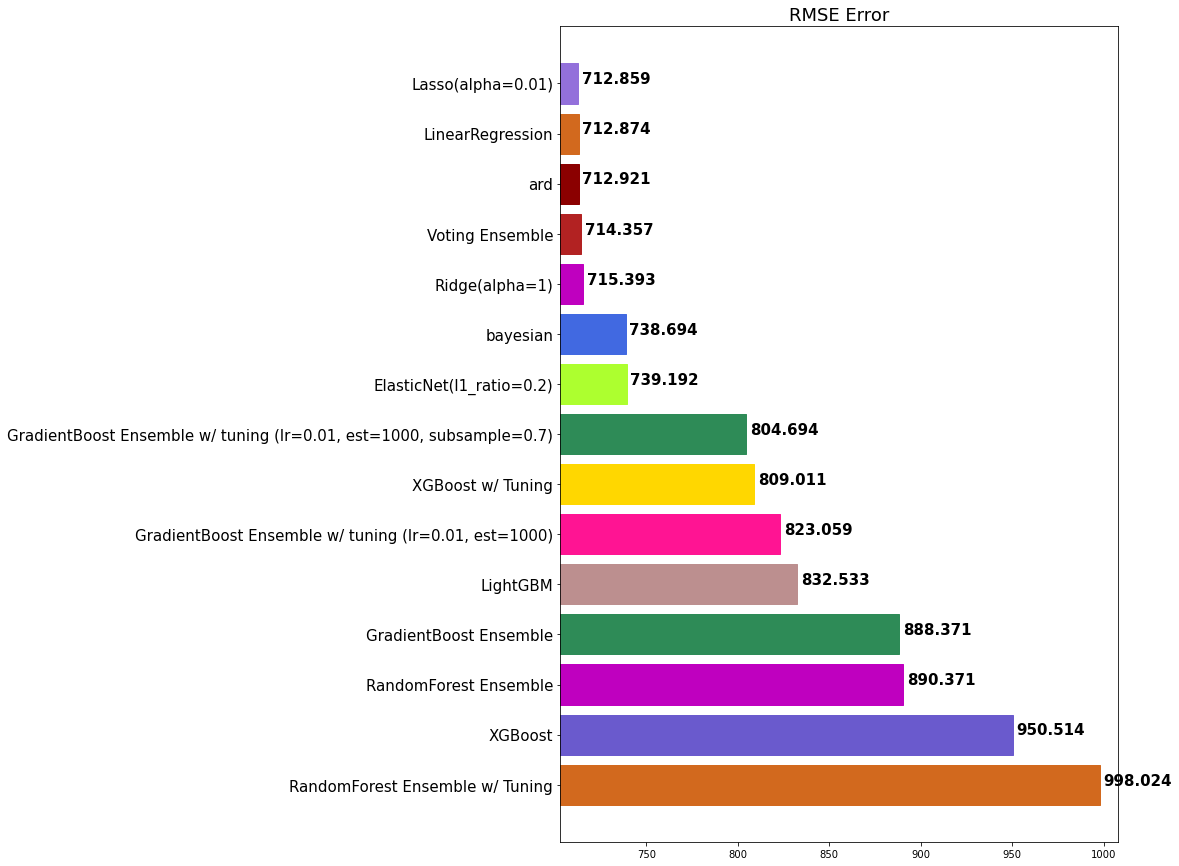

In [47]:
lgbm_pred = lgbm.predict(X_dev)
rmse_eval('LightGBM', y_dev, lgbm_pred)

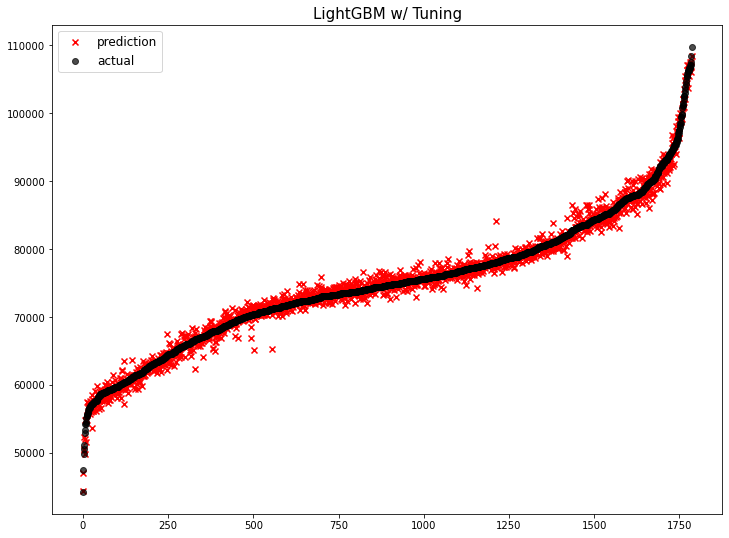

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                            LightGBM   832.532905
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
7                                   XGBoost w/ Tuning   809.010517
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
9                            ElasticNet(l1_ratio=0.2)   739.192023
10                                           bayesian   738.693866
11                                     Ridge(alpha=1)   715.392932
12                                    Voting Ensemble   714.357333
13                                                ard   712.92

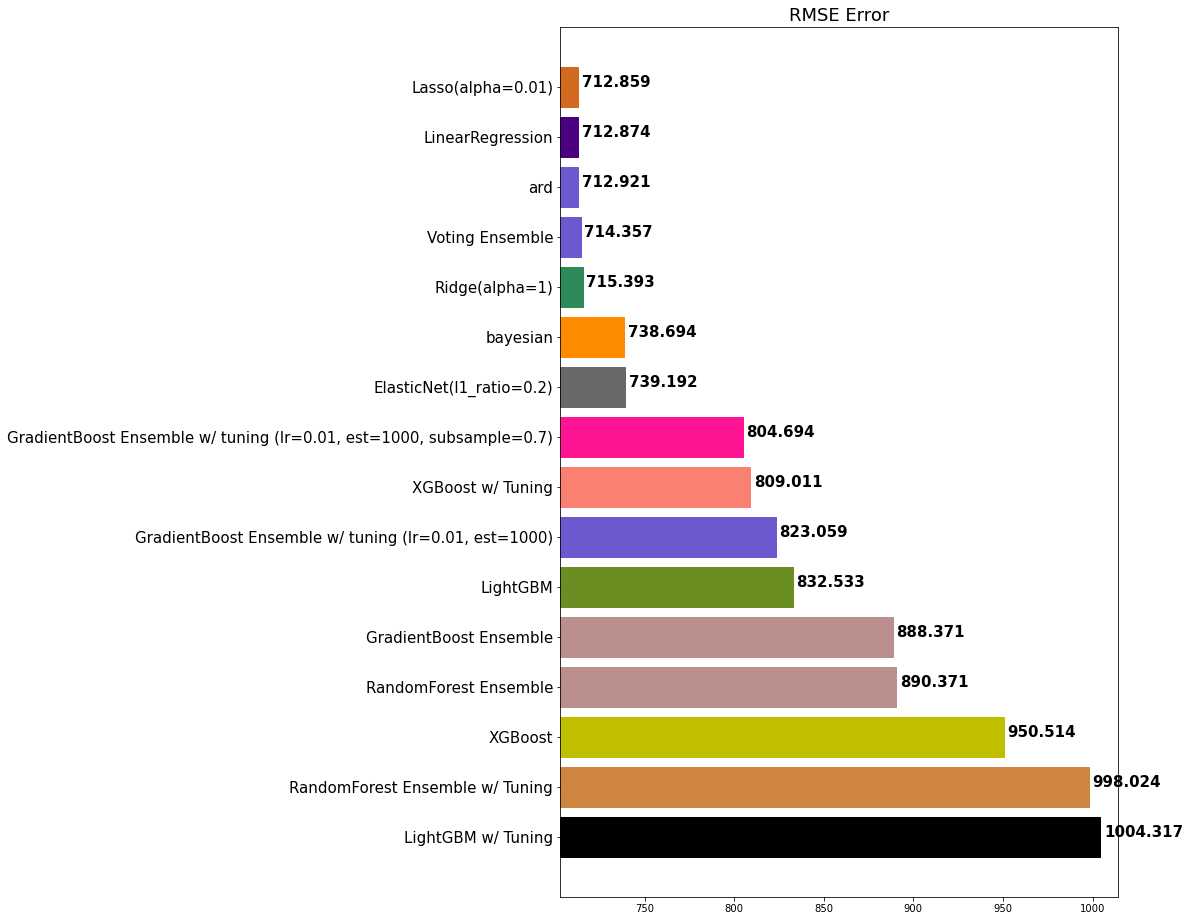

In [48]:
lgbm_t = LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.7, subsample=0.7, max_depth=9)
lgbm_t.fit(X_train, y_train)
lgbm_t_pred = lgbm_t.predict(X_dev)
rmse_eval('LightGBM w/ Tuning', y_dev, lgbm_t_pred)

스태킹앙상블(회귀버전)

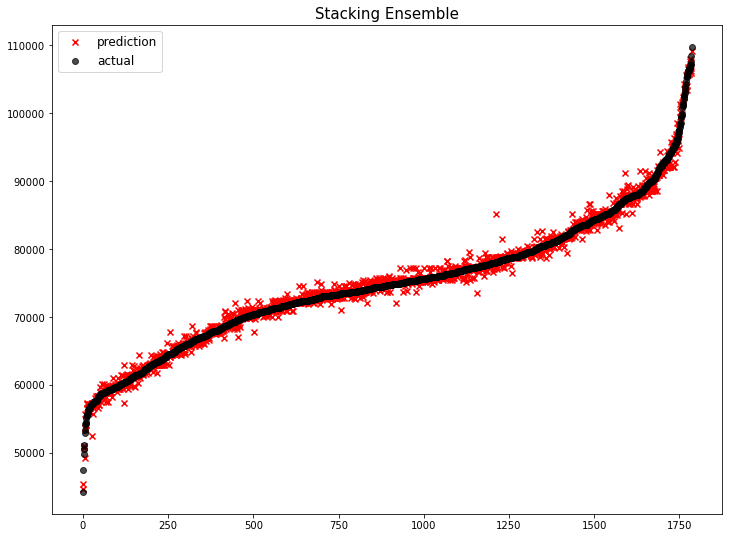

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                            LightGBM   832.532905
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
7                                   Stacking Ensemble   819.010309
8                                   XGBoost w/ Tuning   809.010517
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
10                           ElasticNet(l1_ratio=0.2)   739.192023
11                                           bayesian   738.693866
12                                     Ridge(alpha=1)   715.392932
13                                    Voting Ensemble   714.35

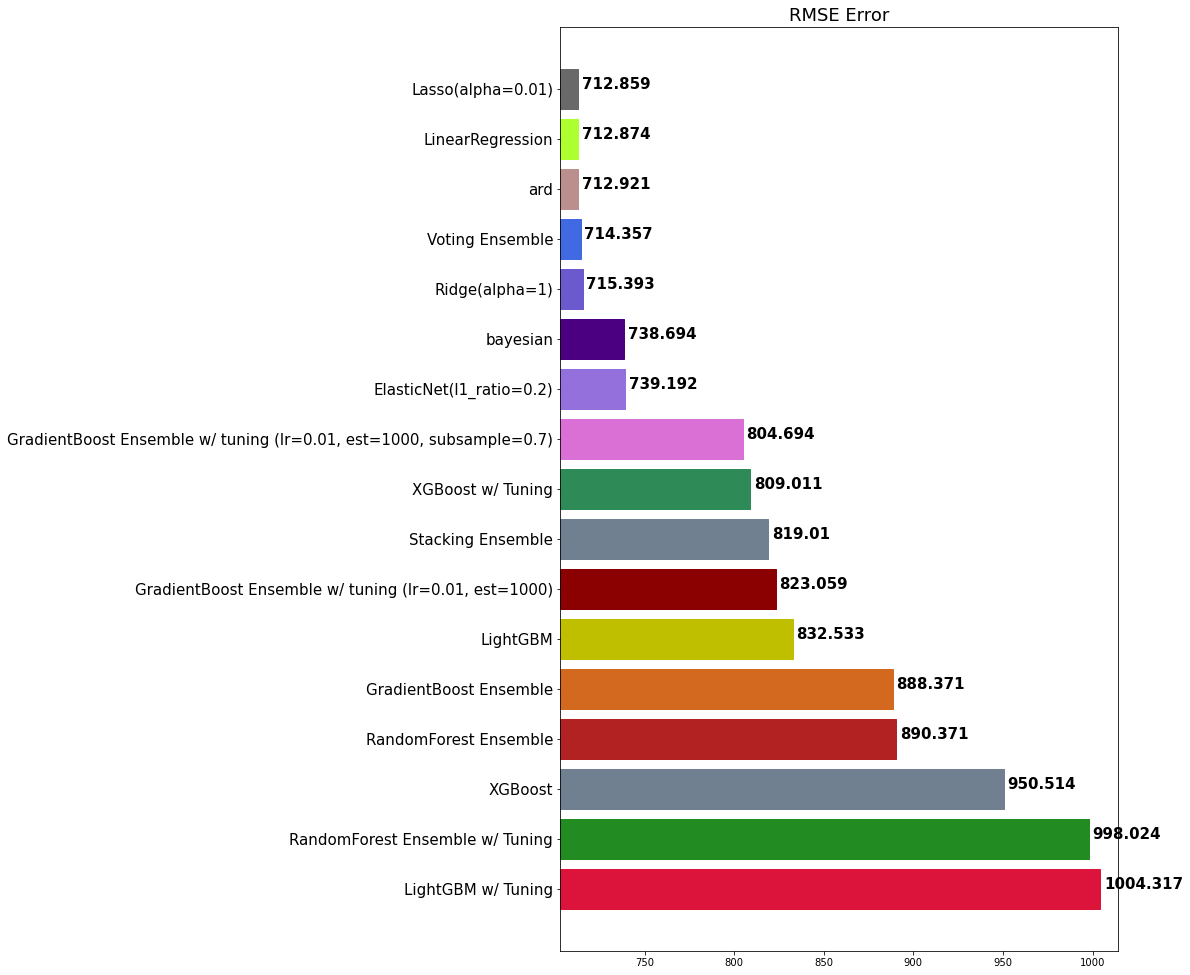

In [49]:
stack_models = [
    ('linear_reg',linear_reg),
    ('ard', ard),
    ('ridge', ridge)]
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_dev)
rmse_eval('Stacking Ensemble', y_dev, stack_pred)

랜덤서치

In [50]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='rmse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

RandomForestRegressor(criterion='rmse', random_state=1)

In [51]:
params = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 2000, 3000],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

In [52]:
rcv_lgbm = RandomizedSearchCV(LGBMRegressor(), params, random_state=1, cv=5, n_iter=100, scoring='neg_mean_squared_error')
rcv_lgbm.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [53]:
RandomizedSearchCV(cv=5, #error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           #silen...
                                           subsample_freq=0),
                   #iid='deprecated', 
                   n_iter=100, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [54]:
rcv_lgbm.best_score_

-41808934.049467154

In [55]:
rcv_lgbm.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0}

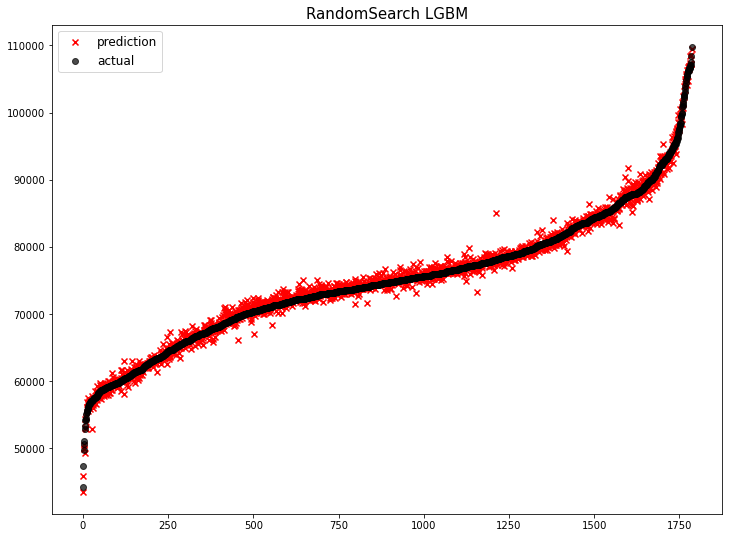

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                   RandomSearch LGBM   854.063552
6                                            LightGBM   832.532905
7   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
8                                   Stacking Ensemble   819.010309
9                                   XGBoost w/ Tuning   809.010517
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
11                           ElasticNet(l1_ratio=0.2)   739.192023
12                                           bayesian   738.693866
13                                     Ridge(alpha=1)   715.39

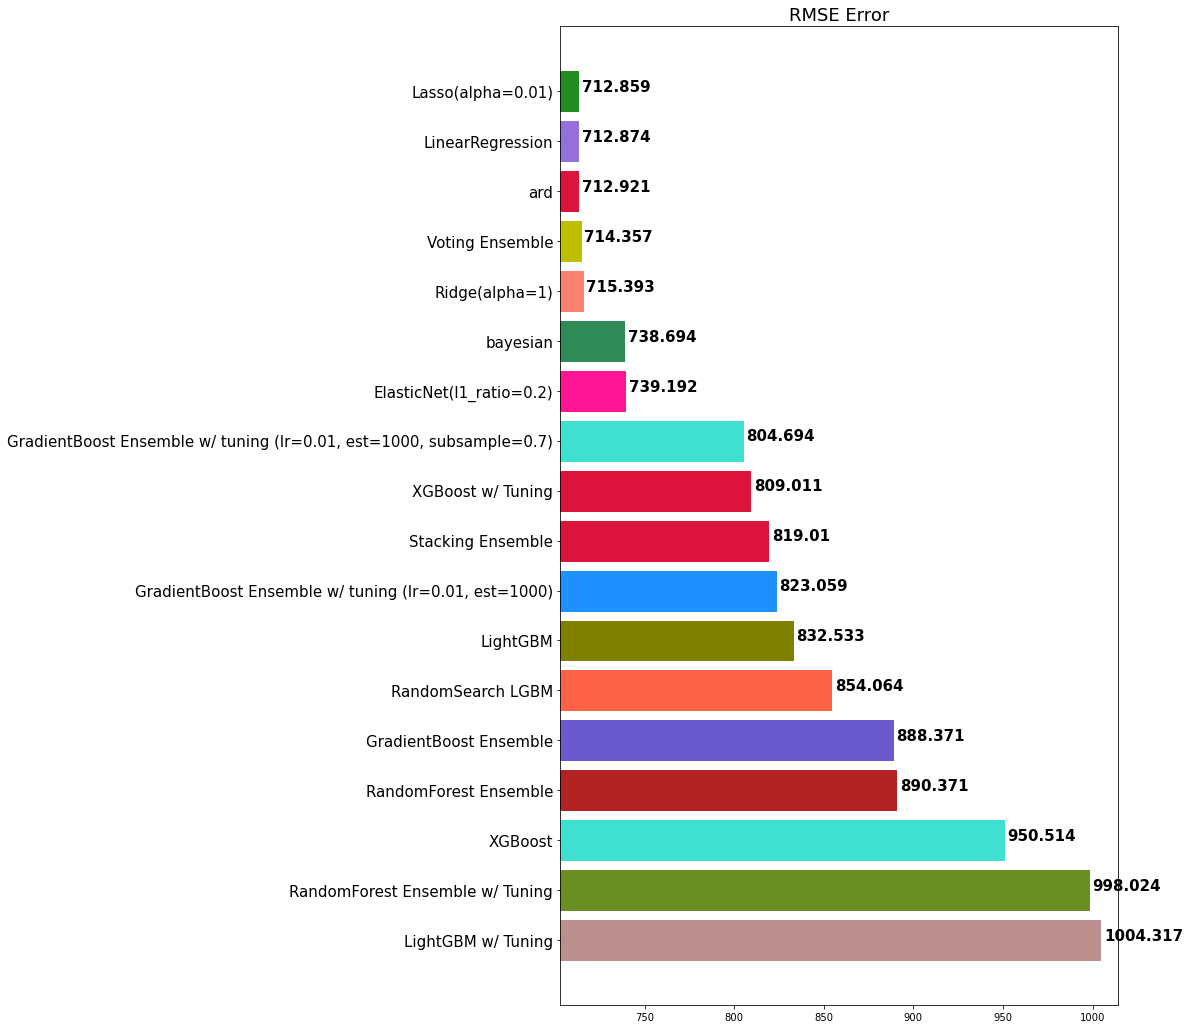

In [56]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=1000, subsample=0.8, max_depth=3, colsample_bytree=0.9)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(X_dev)
rmse_eval('RandomSearch LGBM', y_dev, lgbm_best_pred)

그리드서치

In [57]:
params = {
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [800, 1000, 1200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'subsample': [0.8, 0.85, 0.9],
}
grid_search = GridSearchCV(LGBMRegressor(), params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [58]:
GridSearchCV(cv=5, #error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             #iid='deprecated', 
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=5, estimator=LGBMRegressor(silent=True), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_score_

-41975475.35495652

In [60]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.06,
 'max_depth': 3,
 'n_estimators': 1200,
 'subsample': 0.8}

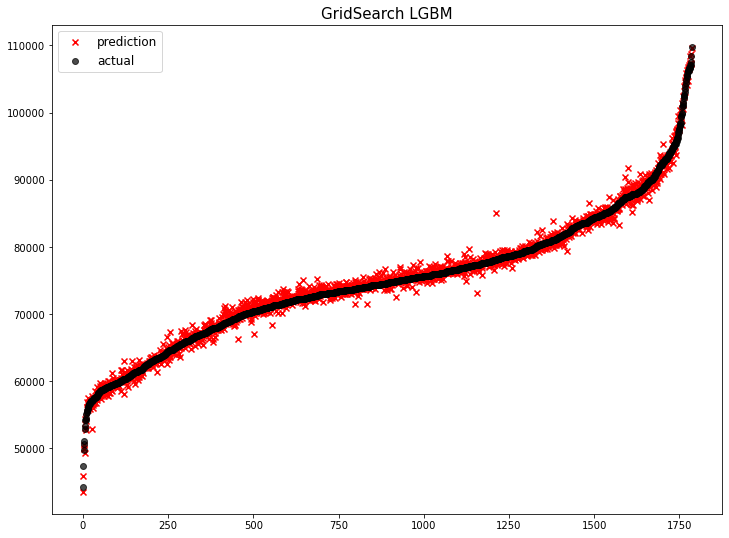

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                   RandomSearch LGBM   854.063552
6                                     GridSearch LGBM   853.512603
7                                            LightGBM   832.532905
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
9                                   Stacking Ensemble   819.010309
10                                  XGBoost w/ Tuning   809.010517
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
12                           ElasticNet(l1_ratio=0.2)   739.192023
13                                           bayesian   738.69

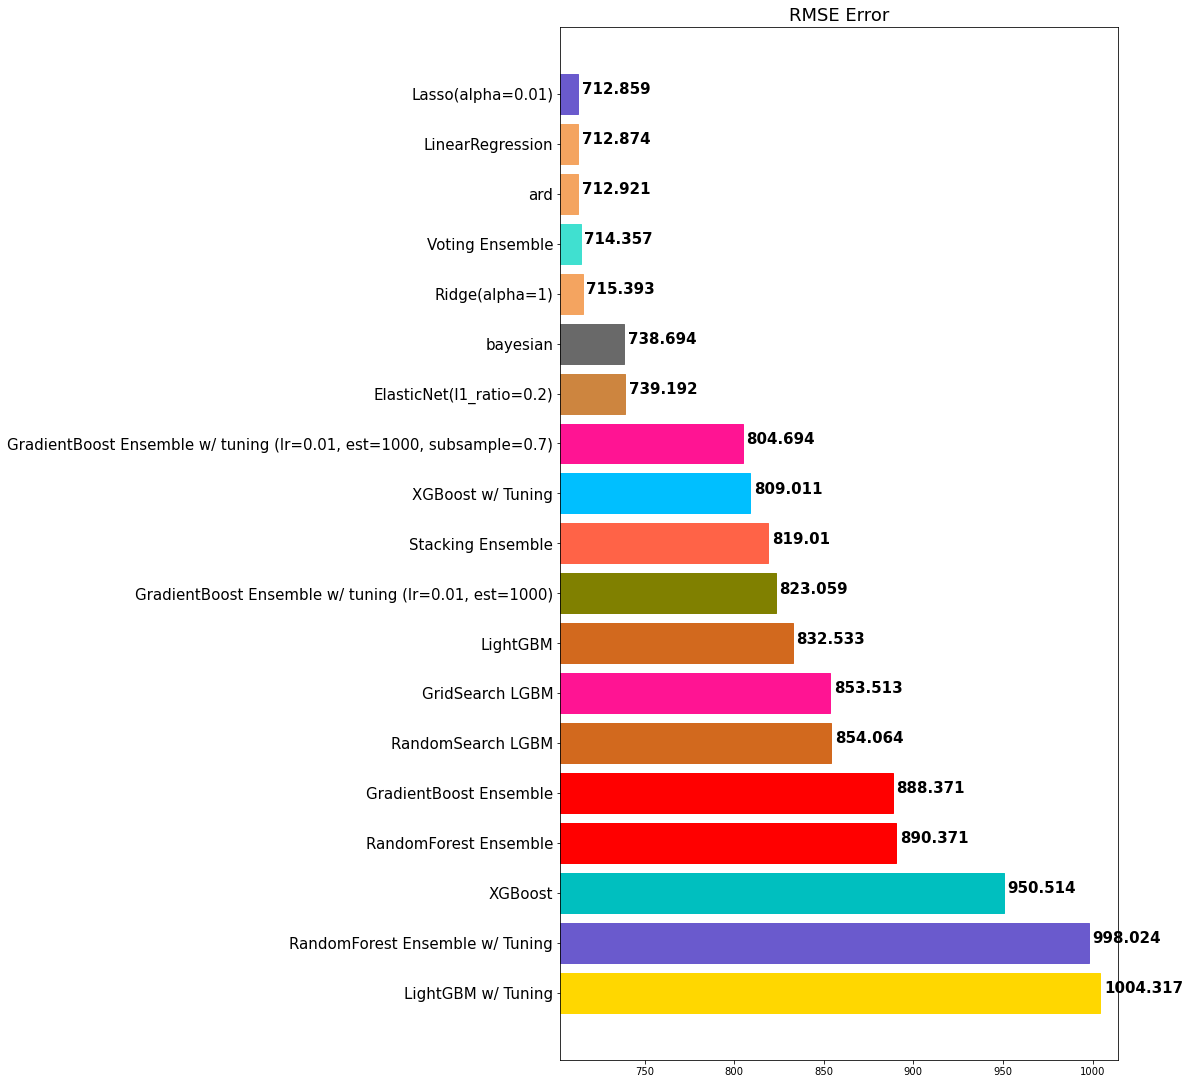

In [61]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=800, subsample=0.8, max_depth=3, colsample_bytree=0.9)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(X_dev)
rmse_eval('GridSearch LGBM', y_dev, lgbm_best_pred)

In [62]:
models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet,stack_reg,voting_regressor]
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=25), scoring='r2')
    cv_scores.append(scores)
    print(f'{model.__class__.__name__}, \n최고성능: {max([score for scoreArr in cv_scores for score in scoreArr])}\n평균성능: {np.mean(cv_scores)}\n')
    #\ncv성능들: {cv_scores}

RandomForestRegressor, 
최고성능: 0.9954904675731855
평균성능: 0.8587912438414265

GradientBoostingRegressor, 
최고성능: 0.9958327872902175
평균성능: 0.8453462950281438

LGBMRegressor, 
최고성능: 0.9965781795806056
평균성능: 0.8359011941707465

XGBRegressor, 
최고성능: 0.9965781795806056
평균성능: 0.8420512941090152

LinearRegression, 
최고성능: 0.9978372212306872
평균성능: 0.8706403954622736

Ridge, 
최고성능: 0.9978372212306872
평균성능: 0.8896580778678064

Lasso, 
최고성능: 0.9978373638801642
평균성능: 0.9032777570104696

ARDRegression, 
최고성능: 0.9978373638801642
평균성능: 0.9135199931645929

BayesianRidge, 
최고성능: 0.9978373638801642
평균성능: 0.9213727707985337

ElasticNet, 
최고성능: 0.9978373638801642
평균성능: 0.9275694020811072

StackingRegressor, 
최고성능: 0.9978373638801642
평균성능: 0.9227244093128082

VotingRegressor, 
최고성능: 0.9978373638801642
평균성능: 0.9278921883566484



최종 모델 선택 고민중 (randomforest, voting, staking)

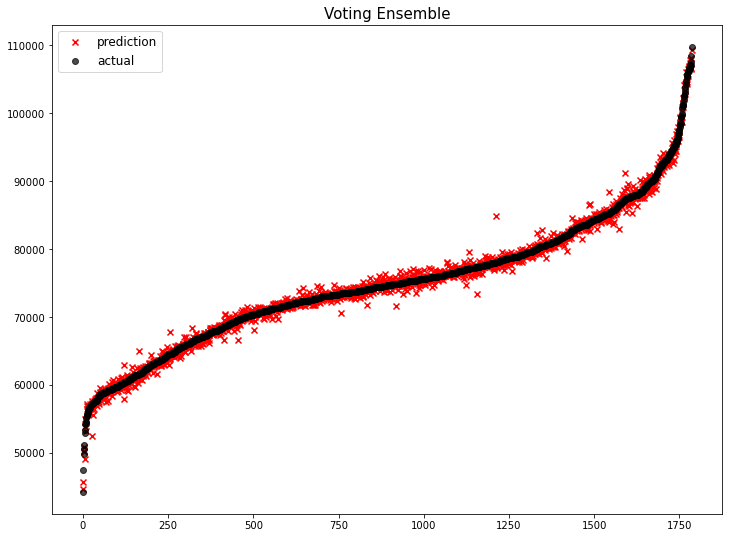

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                   RandomSearch LGBM   854.063552
6                                     GridSearch LGBM   853.512603
7                                            LightGBM   832.532905
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
9                                   Stacking Ensemble   819.010309
10                                  XGBoost w/ Tuning   809.010517
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
12                           ElasticNet(l1_ratio=0.2)   739.192023
13                                           bayesian   738.69

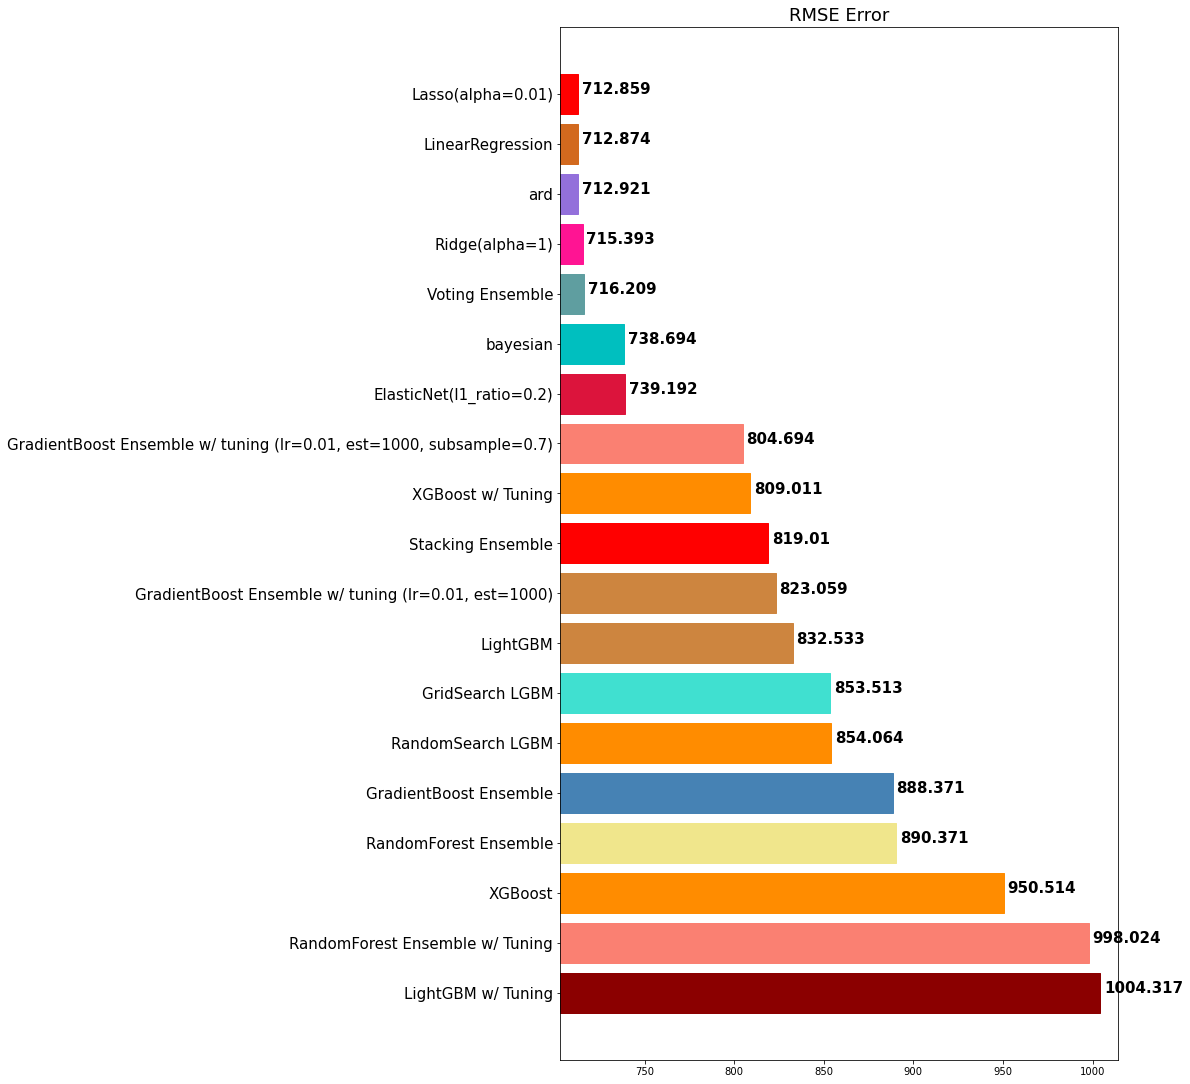

In [63]:
single_models = [
    ('bayesian ', bayesian),
    ('ridge', ridge),
    #('rfr', rfr),
    ('ard',ard)
    
]
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

voting_pred = voting_regressor.predict(X_dev)
rmse_eval('Voting Ensemble', y_dev, voting_pred)

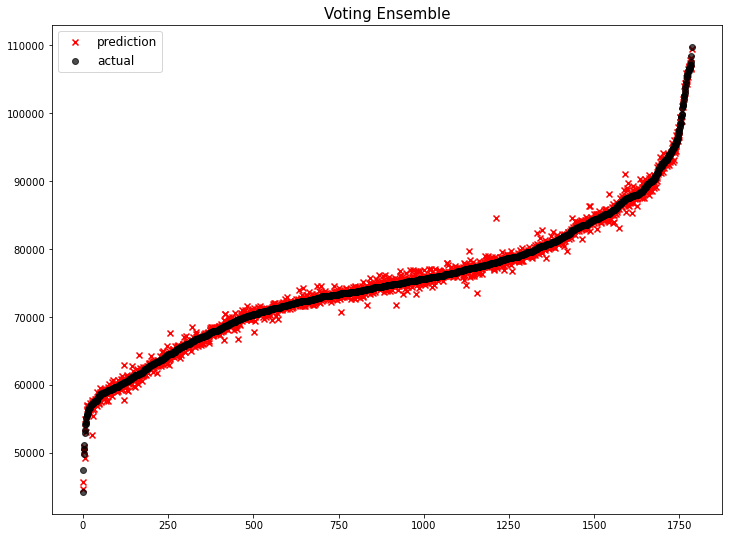

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                   RandomSearch LGBM   854.063552
6                                     GridSearch LGBM   853.512603
7                                            LightGBM   832.532905
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
9                                   XGBoost w/ Tuning   809.010517
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
11                                  Stacking Ensemble   803.105128
12                           ElasticNet(l1_ratio=0.2)   739.192023
13                                           bayesian   738.69

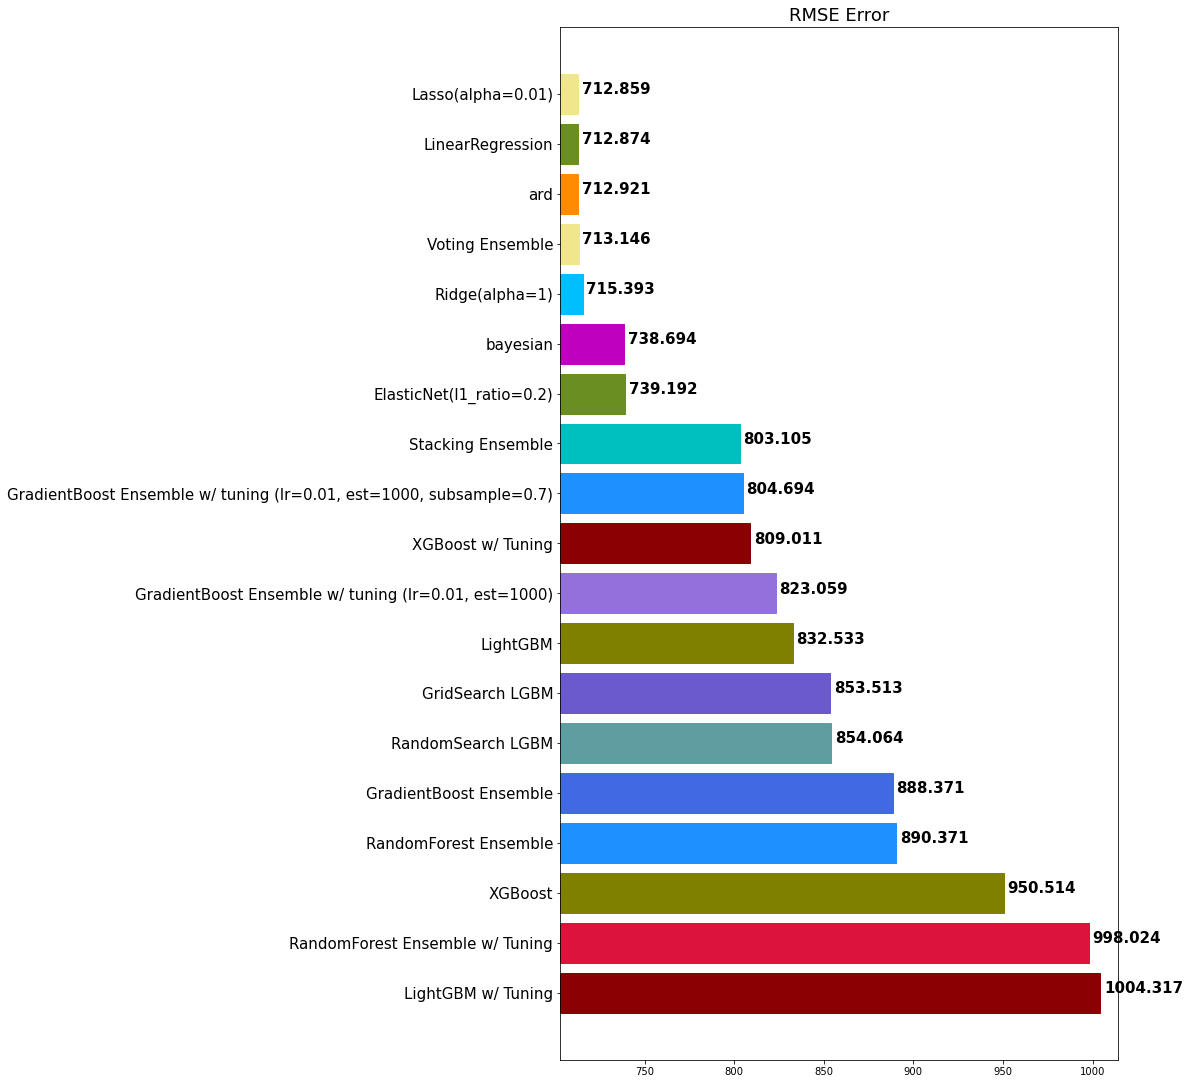

In [90]:
single_models = [
    #('bayesian ', bayesian),
    ('lr ', lr),
    ('ard',ard),
    ('ridge', ridge),
    #('elasticnet', elasticnet)
    
]
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

voting_pred = voting_regressor.predict(X_dev)
rmse_eval('Voting Ensemble', y_dev, voting_pred)

In [92]:
models = [lr ,ridge,lasso,ard, bayesian,elasticnet,voting_regressor]
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=30), scoring='r2')
    cv_scores.append(scores)
    print(f'{model.__class__.__name__}, \n최고성능: {max([score for scoreArr in cv_scores for score in scoreArr])}\n평균성능: {np.mean(cv_scores)}\n')
    #\ncv성능들: {cv_scores}

LinearRegression, 
최고성능: 0.9965550120528965
평균성능: 0.9661191280431208

Ridge, 
최고성능: 0.9966533442408081
평균성능: 0.9656749650115063

Lasso, 
최고성능: 0.9966749437291063
평균성능: 0.9651336278475507

ARDRegression, 
최고성능: 0.9966749437291063
평균성능: 0.9654363583249157

BayesianRidge, 
최고성능: 0.9966749437291063
평균성능: 0.964171465300682

ElasticNet, 
최고성능: 0.9966749437291063
평균성능: 0.9624740224385113

VotingRegressor, 
최고성능: 0.9966749437291063
평균성능: 0.9629784616087511



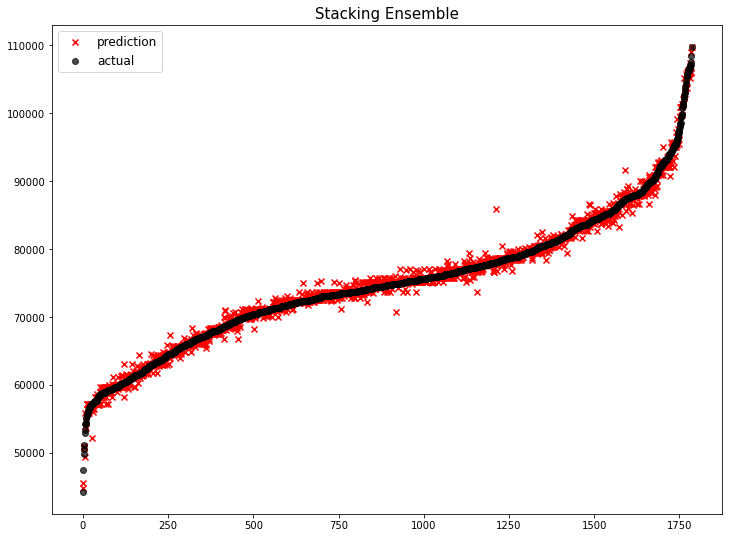

                                                model         rmse
0                                  LightGBM w/ Tuning  1004.316901
1                     RandomForest Ensemble w/ Tuning   998.024011
2                                             XGBoost   950.514117
3                               RandomForest Ensemble   890.370605
4                              GradientBoost Ensemble   888.371149
5                                   RandomSearch LGBM   854.063552
6                                     GridSearch LGBM   853.512603
7                                            LightGBM   832.532905
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...   823.059089
9                                   XGBoost w/ Tuning   809.010517
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...   804.694014
11                                  Stacking Ensemble   803.105128
12                           ElasticNet(l1_ratio=0.2)   739.192023
13                                           bayesian   738.69

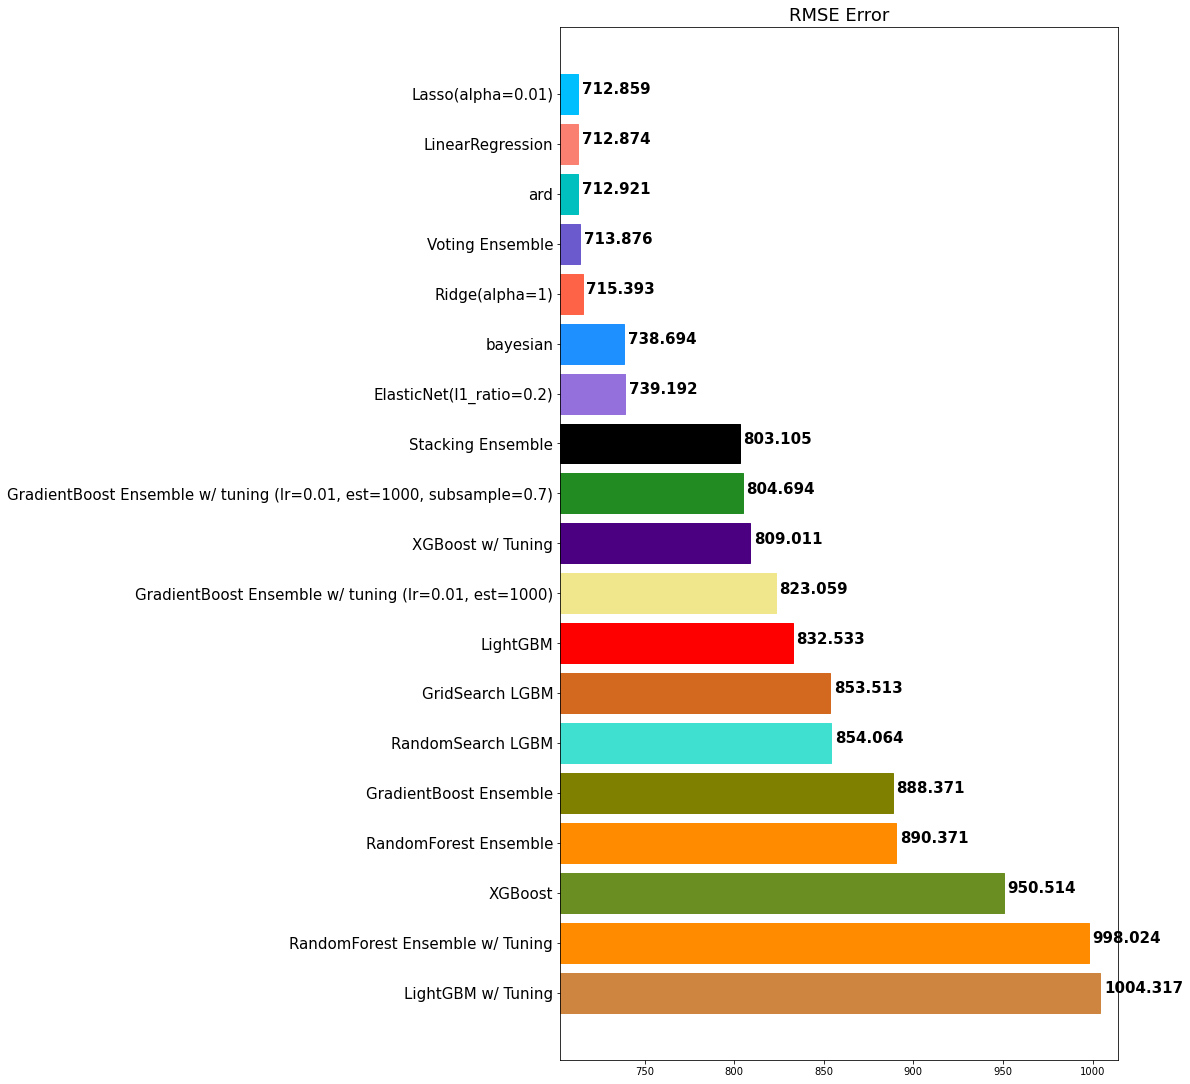

In [66]:
stack_models = [
    ('bayesian ', bayesian),
    ('ridge', ridge),
    ('ard',ard)]
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_dev)
rmse_eval('Stacking Ensemble', y_dev, stack_pred)

In [67]:
rf = RandomForestRegressor(random_state=0, n_jobs=4)
gbm = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000,subsample=0.7)
lgbm = lightgbm.LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.7, subsample=0.7, max_depth=9)
xgb = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)
lr = LinearRegression(n_jobs=4)
#cb = CatBoostRegressor(random_state=0)
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
ridge = Ridge(alpha=1)
lasso = Lasso()
ard = ARDRegression()
bayesian = BayesianRidge()

models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet]

In [96]:
models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet,stack_reg,voting_regressor]
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20), scoring='r2')
    cv_scores.append(scores)
    print(f'{model.__class__.__name__}, \n최고성능: {max([score for scoreArr in cv_scores for score in scoreArr])}\n평균성능: {np.mean(cv_scores)}\n')
    #\ncv성능들: {cv_scores}

RandomForestRegressor, 
최고성능: 0.9960103065125491
평균성능: 0.9059417292234435

GradientBoostingRegressor, 
최고성능: 0.9965764544423824
평균성능: 0.8897454511583763

LGBMRegressor, 
최고성능: 0.9965764544423824
평균성능: 0.875913659467574

XGBRegressor, 
최고성능: 0.9965764544423824
평균성능: 0.7850053816157563

LinearRegression, 
최고성능: 0.99788439599121
평균성능: 0.8257549114907627

Ridge, 
최고성능: 0.99788439599121
평균성능: 0.8528927597795269

Lasso, 
최고성능: 0.99788439599121
평균성능: 0.8722843766628632

ARDRegression, 
최고성능: 0.99788439599121
평균성능: 0.8868565105019484

BayesianRidge, 
최고성능: 0.99788439599121
평균성능: 0.8981012112290916

ElasticNet, 
최고성능: 0.99788439599121
평균성능: 0.9070486880268741

StackingRegressor, 
최고성능: 0.99788439599121
평균성능: 0.908368571440171

VotingRegressor, 
최고성능: 0.99788439599121
평균성능: 0.9150677514648379



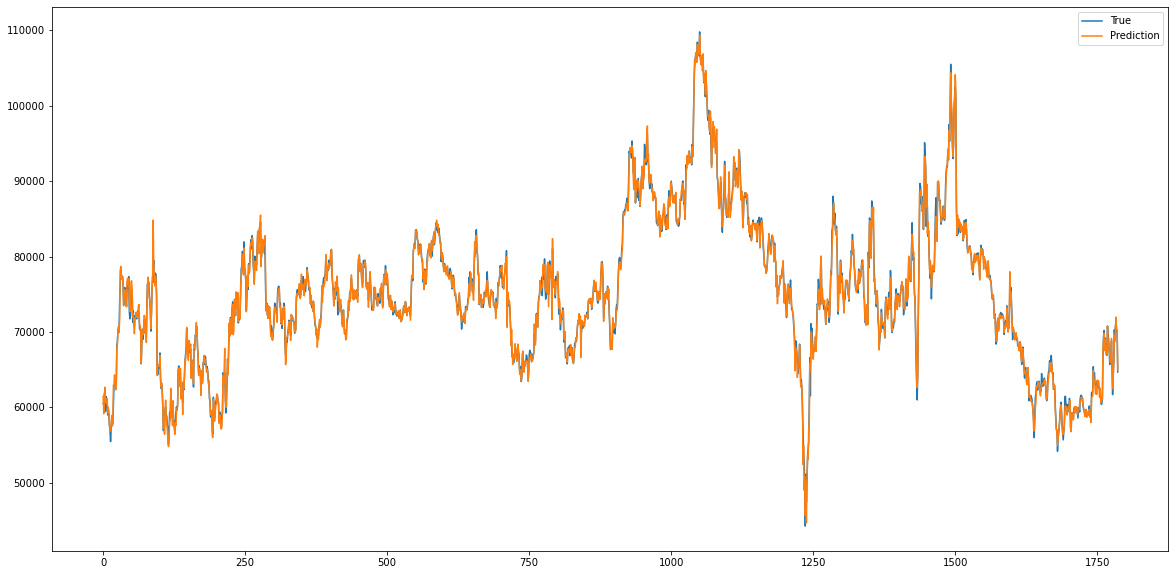

In [94]:
single_models = [
    ('bayesian ', bayesian),
    ('ridge', ridge),
    #('rfr', rfr),
    ('ard',ard)
    
]
model = VotingRegressor(single_models, n_jobs=-1)

model.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

y_pred = model.predict(X_dev)

fig = plt.figure(facecolor = 'white',figsize =(20,10))
ax = fig.add_subplot(111)
ax.plot(y_dev,label='True')
ax.plot(y_pred,label = 'Prediction')
ax.legend()
plt.show()

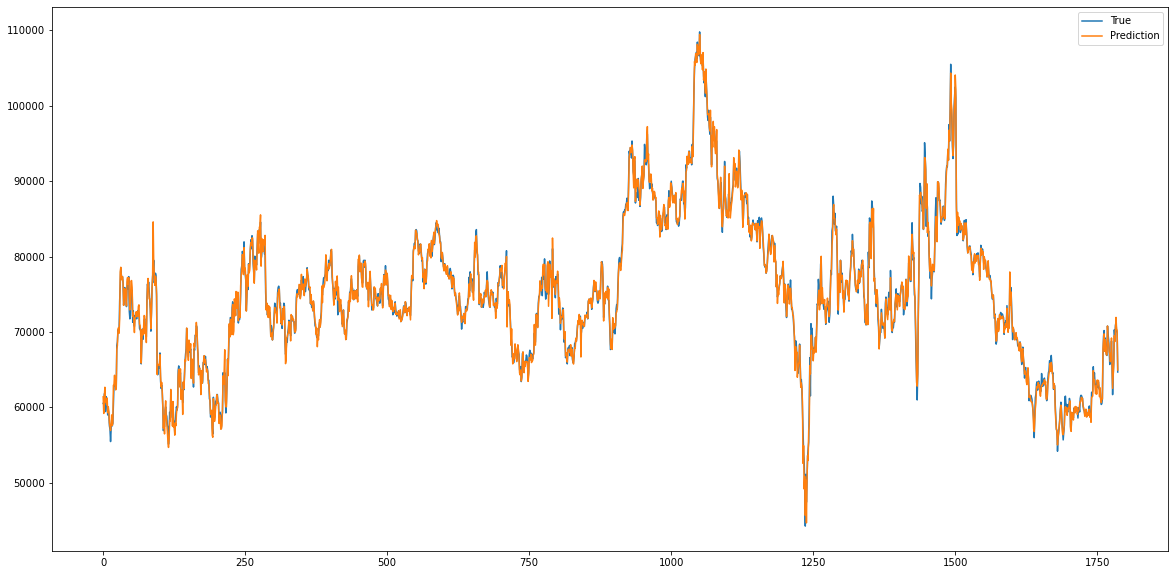

In [95]:
single_models = [
    #('bayesian ', bayesian),
    ('lr ', lr),
    ('ard',ard),
    ('ridge', ridge),
    #('elasticnet', elasticnet)
]
model = VotingRegressor(single_models, n_jobs=-1)

model.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

y_pred = model.predict(X_dev)

fig = plt.figure(facecolor = 'white',figsize =(20,10))
ax = fig.add_subplot(111)
ax.plot(y_dev,label='True')
ax.plot(y_pred,label = 'Prediction')
ax.legend()
plt.show()